<a href="https://colab.research.google.com/github/ShreeKeshavan/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATA DICTONARY**

1. Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. associated with a particular car model.
2. normalized-losses : Normalized losses refer to the average loss payment per insured vehicle
3. make : Name of car company
4. fuel-type : Car fuel type 
5. aspiration : Aspiration used in the car
6. num-of-doors : Number of doors in a car
7. body-style : Shape and layout of the car's exterior of the car
8. drive-wheels : Type of drive wheel
9. engine-location : Location of the car engine
10. wheel-base : Weelbase of the car 
11. length : Length of the car
12. width : Width of the car
13. height : Height of the car
14. curb-weight : The weight of a car without occupants or baggage
15. engine-type : Type of engine
16. num-of-cylinders : Cylinders placed in the car
17. engine-size : Size of the car engine 
18. fuel-system : Fuel system of the car
19. bore : Boreratio of the car
20. stroke : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. compression-ratio : Compression ratio of car
22. horsepower : Horsepower of the car
23. peak-rpm : The peak revolutions per minute of an engine of the car
24. city-mpg : Car's mileage in the city
25. highway-mpg : Car's mileage on highway
26. price : Price of the car


* Based on the data and data dictionary, We have prediction / regression problem.

* We wil make prediction on the target variable "price"

* And we will build a model to get best prediction on the price variable.

* For that we will use MSE(Root Mean Squared Error) and R2

In [753]:
# Import all the Required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [754]:
# To read the CSV file
df = pd.read_csv('/content/cars_price.csv')

In [755]:
df.head(10)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   
5        sedan          fwd           front        99.8   177.3   66.3   
6        sedan          fwd           front       105.8   192.7   71.4   
7        wagon          fwd           front       105.8   192.7   71.4   
8        sedan          fwd           front       105.8   192.7   71.4   
9    hatchback          4wd           front        99.5   178.2   67.9   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   
5    53.1         2507         ohc             five          136        mpfi   
6    55.7         2844         ohc             five          136        mpfi   
7    55.7         2954         ohc             five          136        mpfi   
8    55.9         3086         ohc             five          131        mpfi   
9    52.0         3053         ohc             five          131        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   
5  3.19    3.4                8.5        110     5500        19           25   
6  3.19    3.4                8.5        110     5500        19           25   
7  3.19    3.4                8.5        110     5500        19           25   
8  3.13    3.4                8.3        140     5500        17           20   
9  3.13    3.4                7.0        160     5500        16           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450  
5  15250  
6  17710  
7  18920  
8  23875  
9      ?

In [756]:
# Shape of the data :
df.shape

(205, 26)

In [757]:
# Dataframe information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* From above output we can observe that 16 categorical & 11 numerical Attributes.
* All the features are not having correct data-types. So we need to analyse the reason.
* All the features are not having correct data-types because of unknown in tha data frame filled with "?" symbol

In [758]:
# Describing the data :
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [759]:
#To check duplicates
df.duplicated().sum()

0

 * From the above output we can say that there is no duplicate records present in our dataset.

In [760]:
#To check no of unique values present in each column
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

* There is no zero variance variable

In [761]:
# To check null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* There are no null values currently because the null values are all filled with "?" symbols.

In [762]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [763]:
#to count the '?' or unknown values present in the dataframe 
has_question_mark = df == "?"
columnwise_results = has_question_mark.sum()
columnwise_results

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [764]:
df.drop('normalized-losses',axis=1,inplace=True)

In [765]:
#converting "?" values to null 
df.replace("?", np.nan, inplace=True)

In [766]:
#total null values in the data set
df.isnull().sum().sum()

18

In [767]:
df = df.fillna(method='ffill')

In [768]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [769]:
print(df.dtypes)

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


* Many numerical columns are in obj type lets convert them

In [770]:
# Converting Obj dtype Numerical columns into Numerical column
columns_to_convert_int = df[['horsepower','peak-rpm']]
for col in columns_to_convert_int:
    df[col] = df[col].astype(int)

columns_to_convert_float = df[['bore','stroke','price']]
for col in columns_to_convert_float:
    df[col] = df[col].astype(float)

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

# **Exploratory Data Analysis (EDA):**

### **Visualizing our Target Feature**

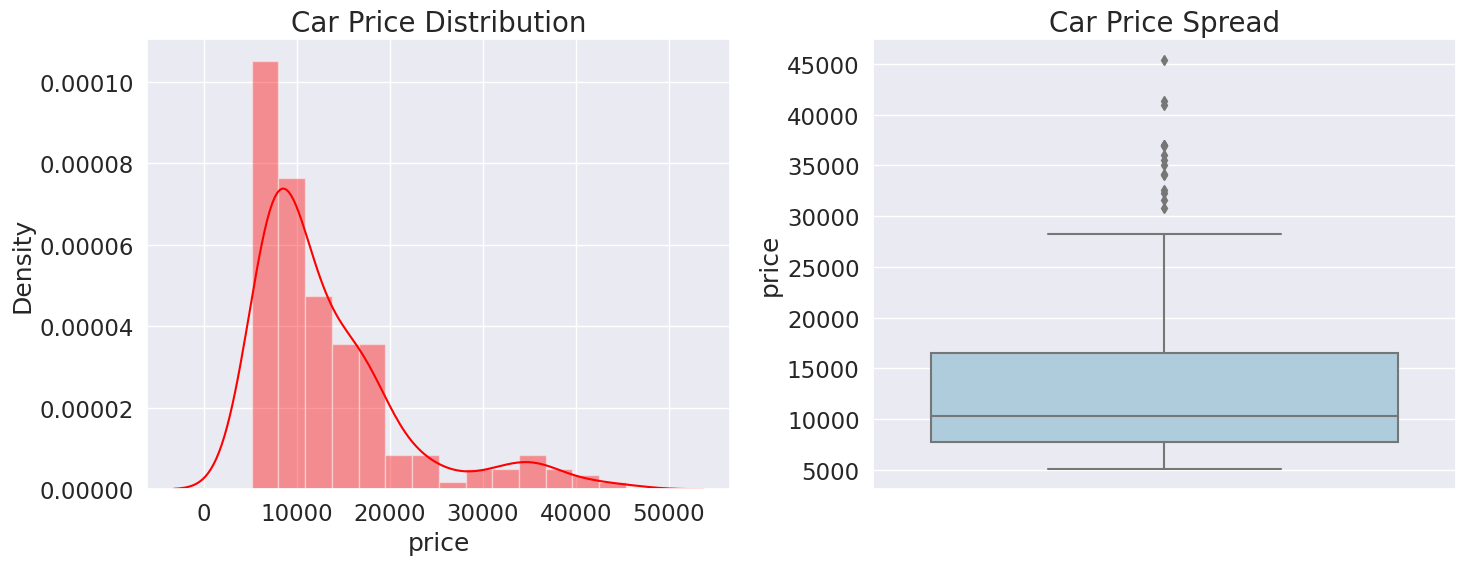

In [772]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Paired")
plt.title("Car Price Spread",fontsize=20)
plt.tight_layout() # to adjusts the spacing between subplots
plt.show()

In [773]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame()

price
min      5118.000000
mean    13312.712195
median  10295.000000
max     45400.000000
std      8102.472461
skew        1.766400

 **Insights**

* We can clearly observe that our Car Price Feature is Right Skewed.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 14000.
* We can also say that the skewness of the car price is above 1.5 which means that the data points are highly spread.

## **Visualizing Categorical columns**

In [774]:
cat_cols = df.select_dtypes(exclude=[np.number])
cat_cols.head()

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front        dohc             four        mpfi  
1           front        dohc             four        mpfi  
2           front        ohcv              six        mpfi  
3           front         ohc             four        mpfi  
4           front         ohc             five        mpfi

### **Visualizing Total No. of cars sold by different company**

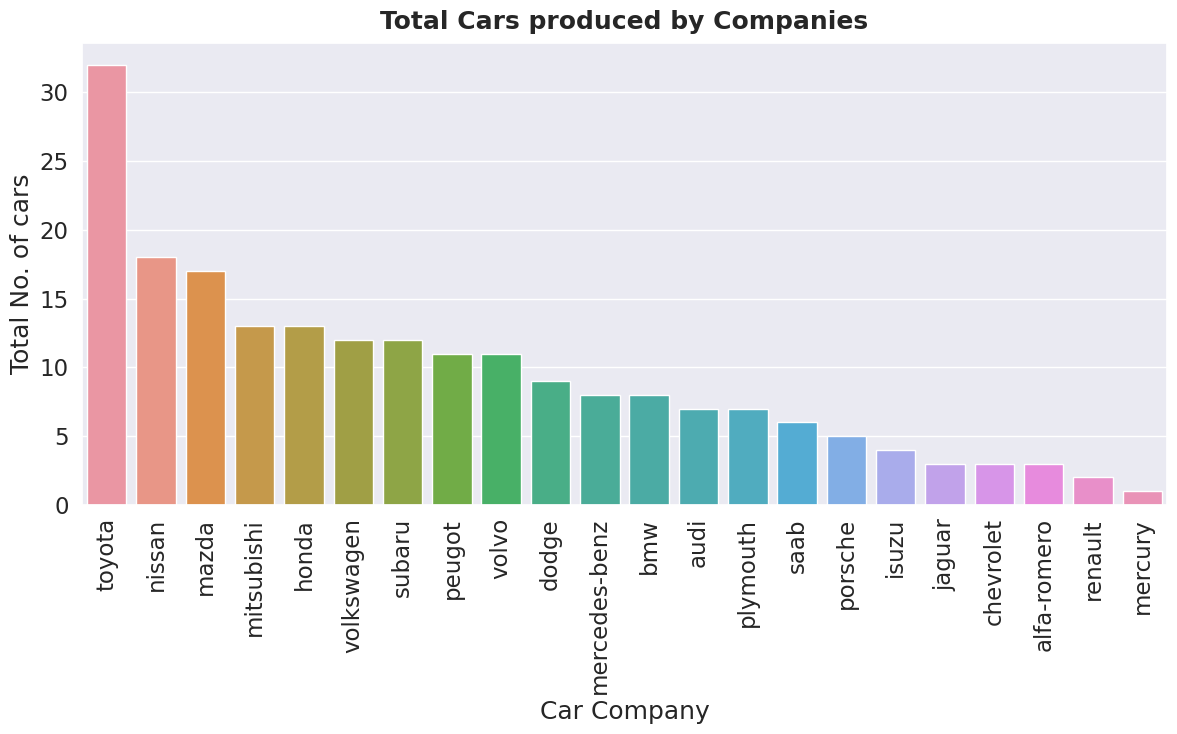

In [775]:
plt.figure(figsize=(14,6))
cars = df["make"].value_counts()
sns.barplot(x=cars.index, y=cars.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars")
plt.title("Total Cars produced by Companies", pad=10, fontweight="black")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Toyota seems to be the most favoured cars.
* Mercury seems to be the least favoured cars.
* So we can say that Toyota is kind of customers most favoured company.
Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

### **Visualizing Car Company with Price**

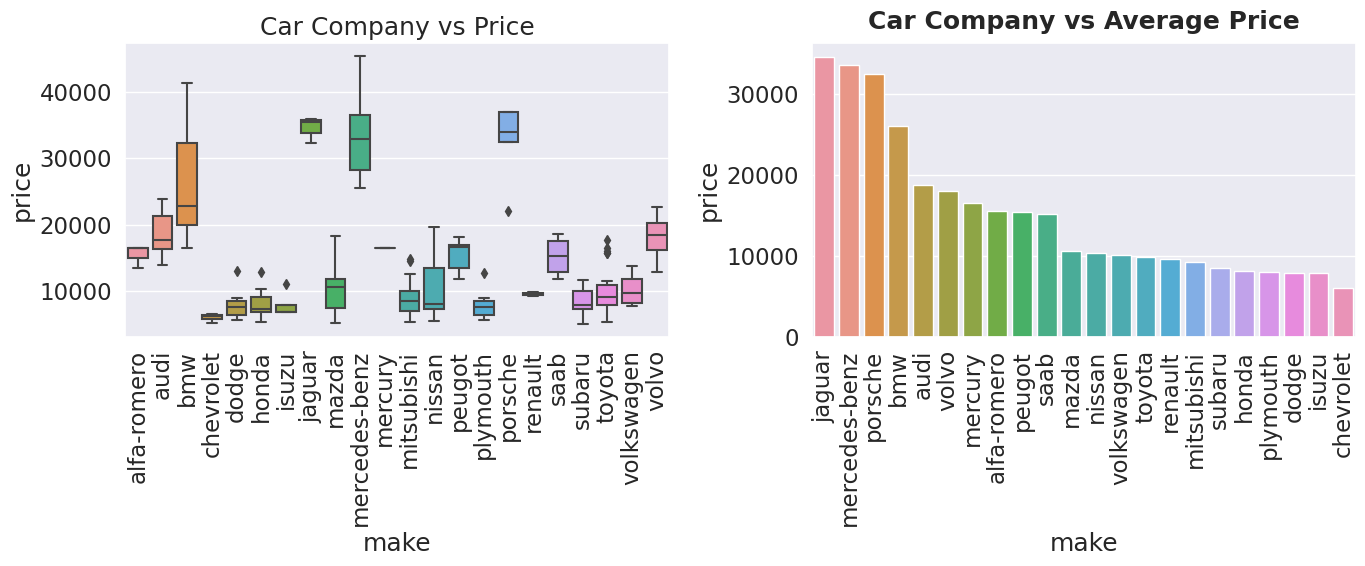

In [776]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price")

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby('make')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black")

plt.tight_layout()
plt.show()

**Insights**

* Jaguar & mercedes-benz seems to have the highest price range cars.
* Chevrolet seems to have the lowest price range cars.

In [777]:
# Function to visualize categorical features

def Categorical_visualization(col):
  plt.figure(figsize=(20,8))
  plt.subplot(1,3,1)
  sns.countplot( x=col, data=df, palette='Paired', order= df[col].value_counts().index)
  plt.title( f'{col} Distribution', pad= 20, fontweight= 'black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,2)
  sns.boxplot(x= col, y='price', data=df, palette='Paired')
  plt.title(f'{col} Vs Price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,3)
  x = pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending=False))
  sns.barplot( x= x.index, y= 'price', data=x, palette='Paired')
  plt.title( f'{col} Vs Average price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

### **Visualizing Car Fuel Type Feature**

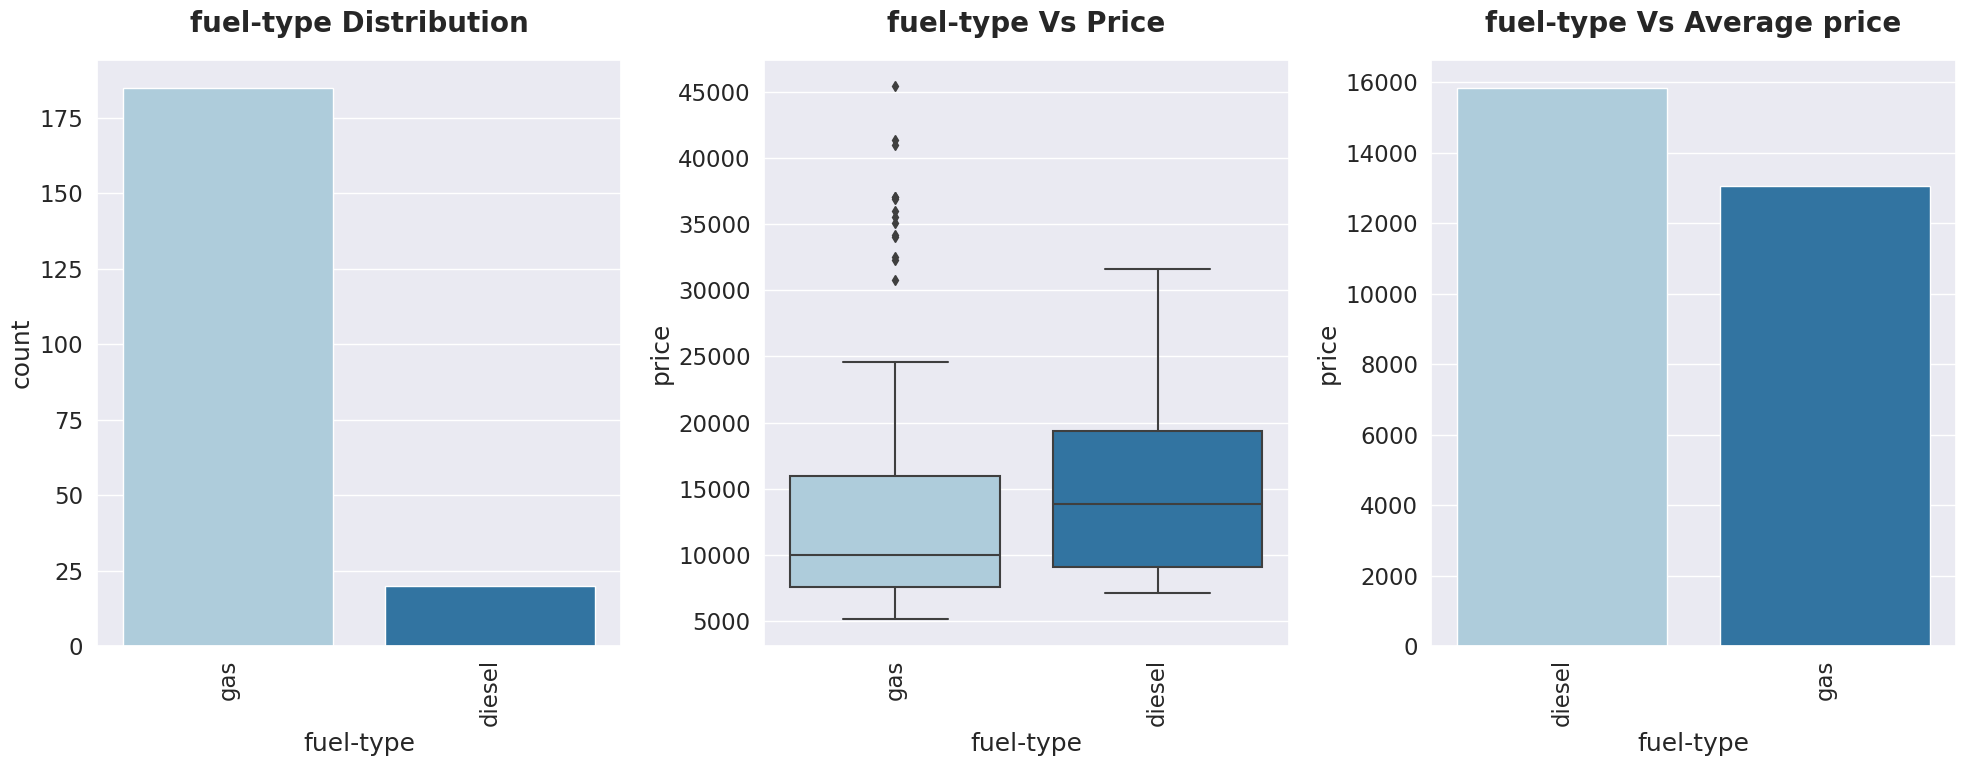

In [778]:
Categorical_visualization('fuel-type')

**Insights**
* We can clearly make an inisght that Cars having gas fuel system is mostly sold.
* From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
* Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
* From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.

* So we can say that customers prefer those cars which consumes less price in fuels.

### **Visualizing Aspiration Feature**

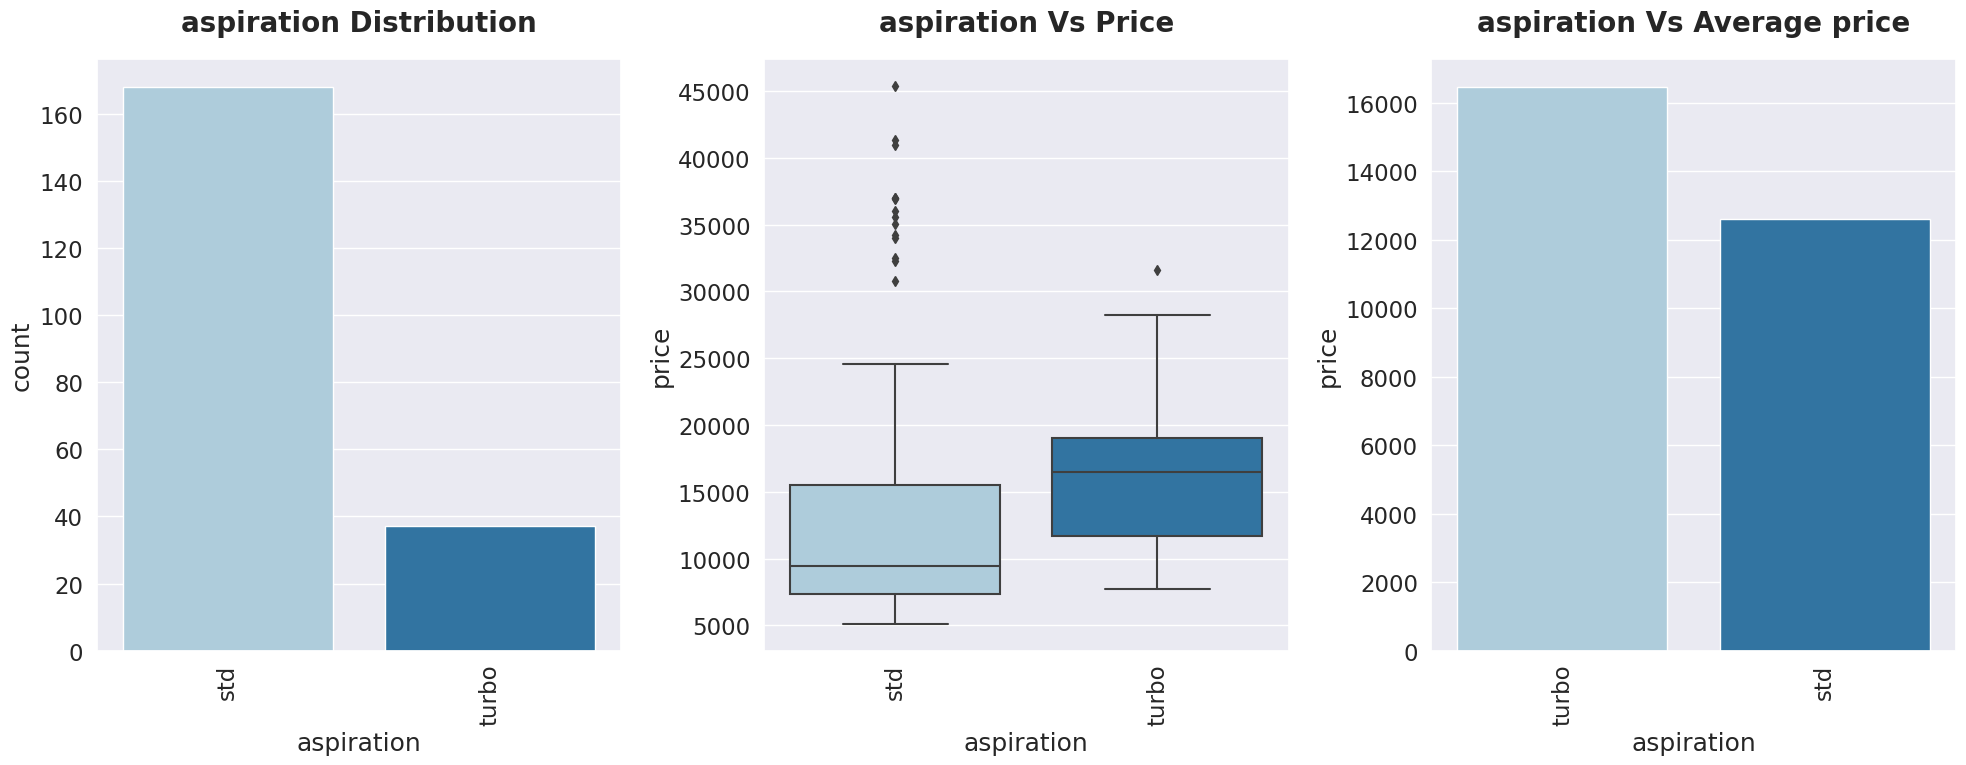

In [779]:
Categorical_visualization('aspiration')

**Observation**

* Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
* Cars having Turbo Aspiration have higher price range than the STD Aspiration.

**Insights**

* Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

### **Visualizing No-of-doors Feature**

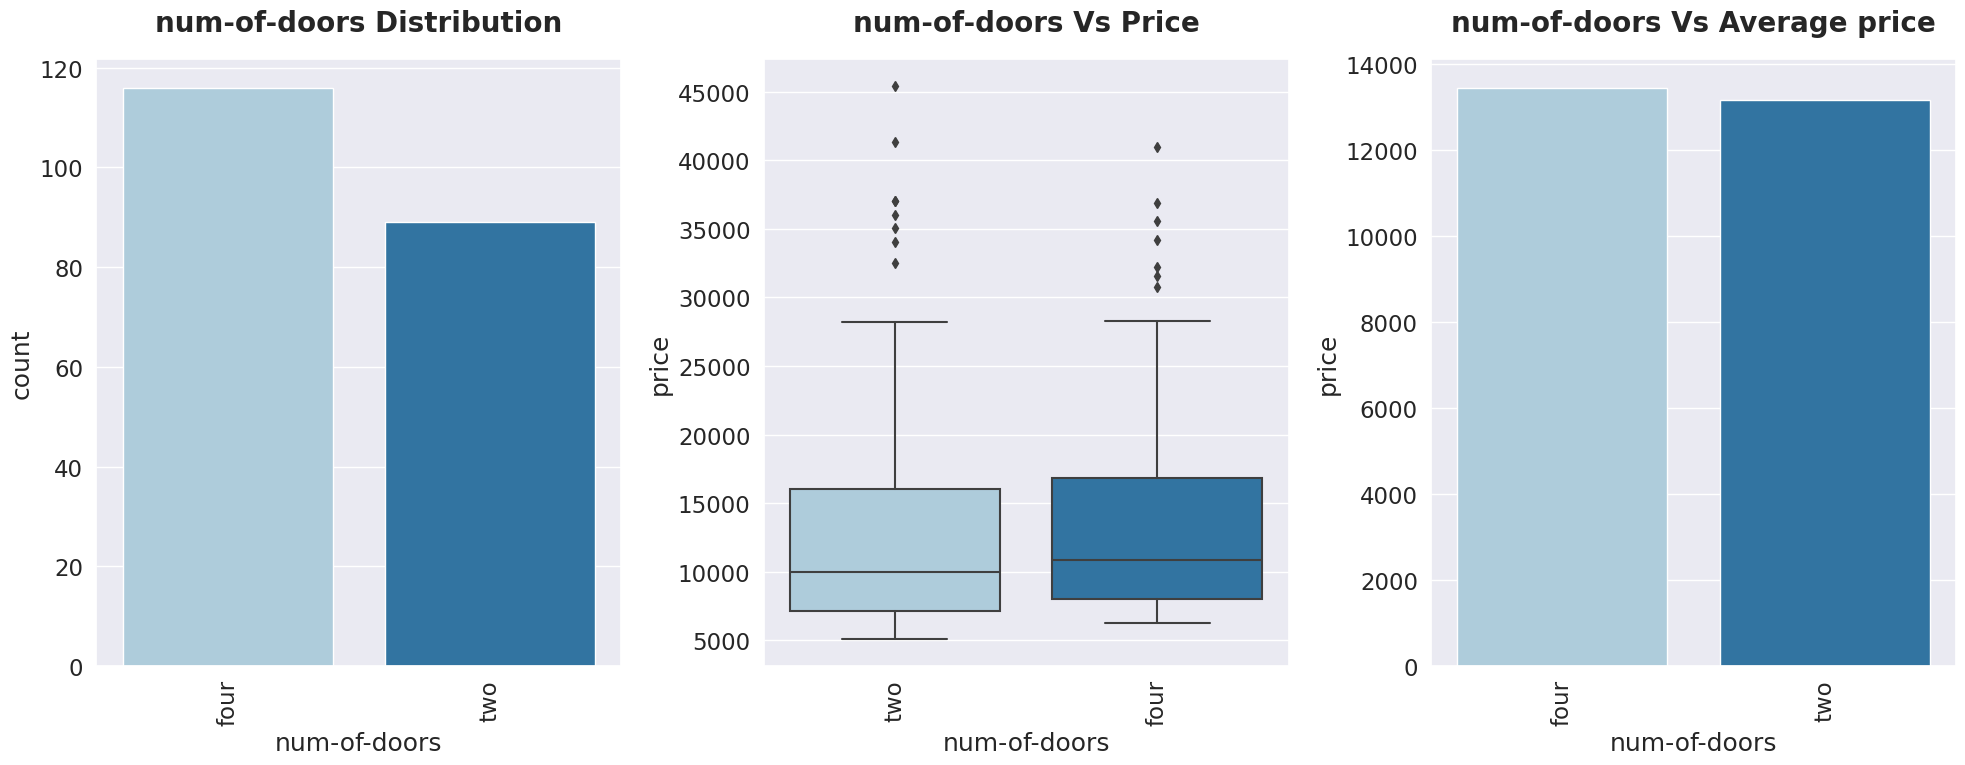

In [780]:
Categorical_visualization('num-of-doors')

**Observation**

* Cars having Four Doors are mostly sold when compared with cars having Two Doors.
* Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

**Insights**

* Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..

* Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors

* Door numbers category is not affecting the price that much.

### **Visualizing Body-style Feature**

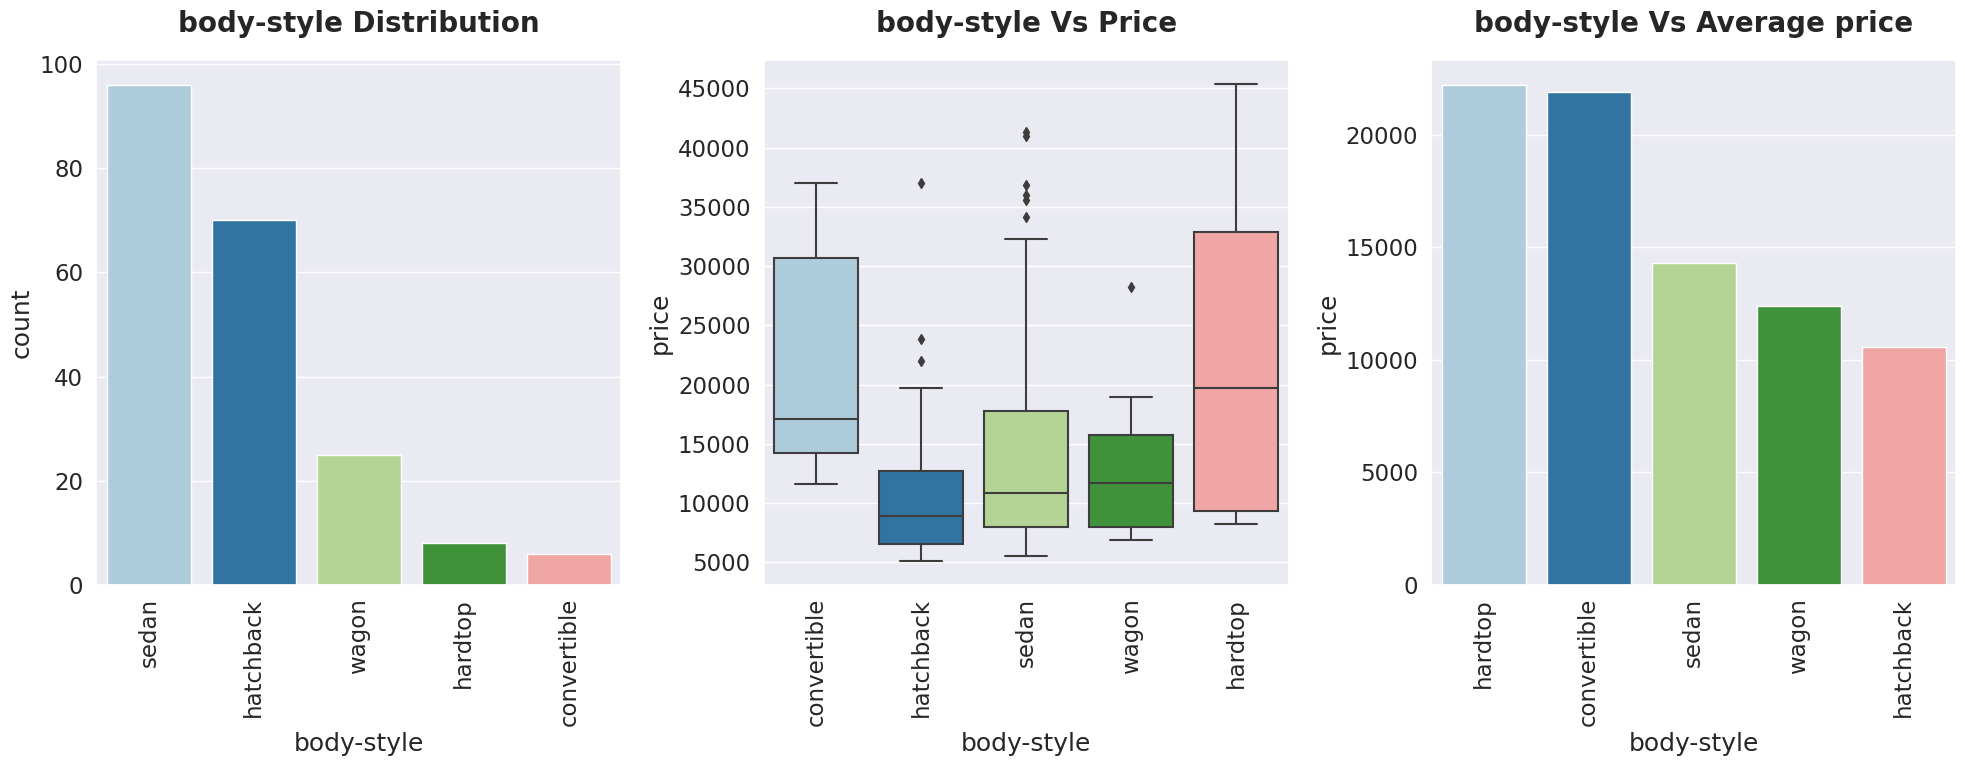

In [781]:
Categorical_visualization('body-style')

**Obseravtion**

* Cars having sedan body-type are mostly sold followed by hatchback.
* Cars having convertible or hardtop body-type are less sold.
* Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

**Insights**

* Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
* Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

### **Visualizing Drive-wheels Feature**

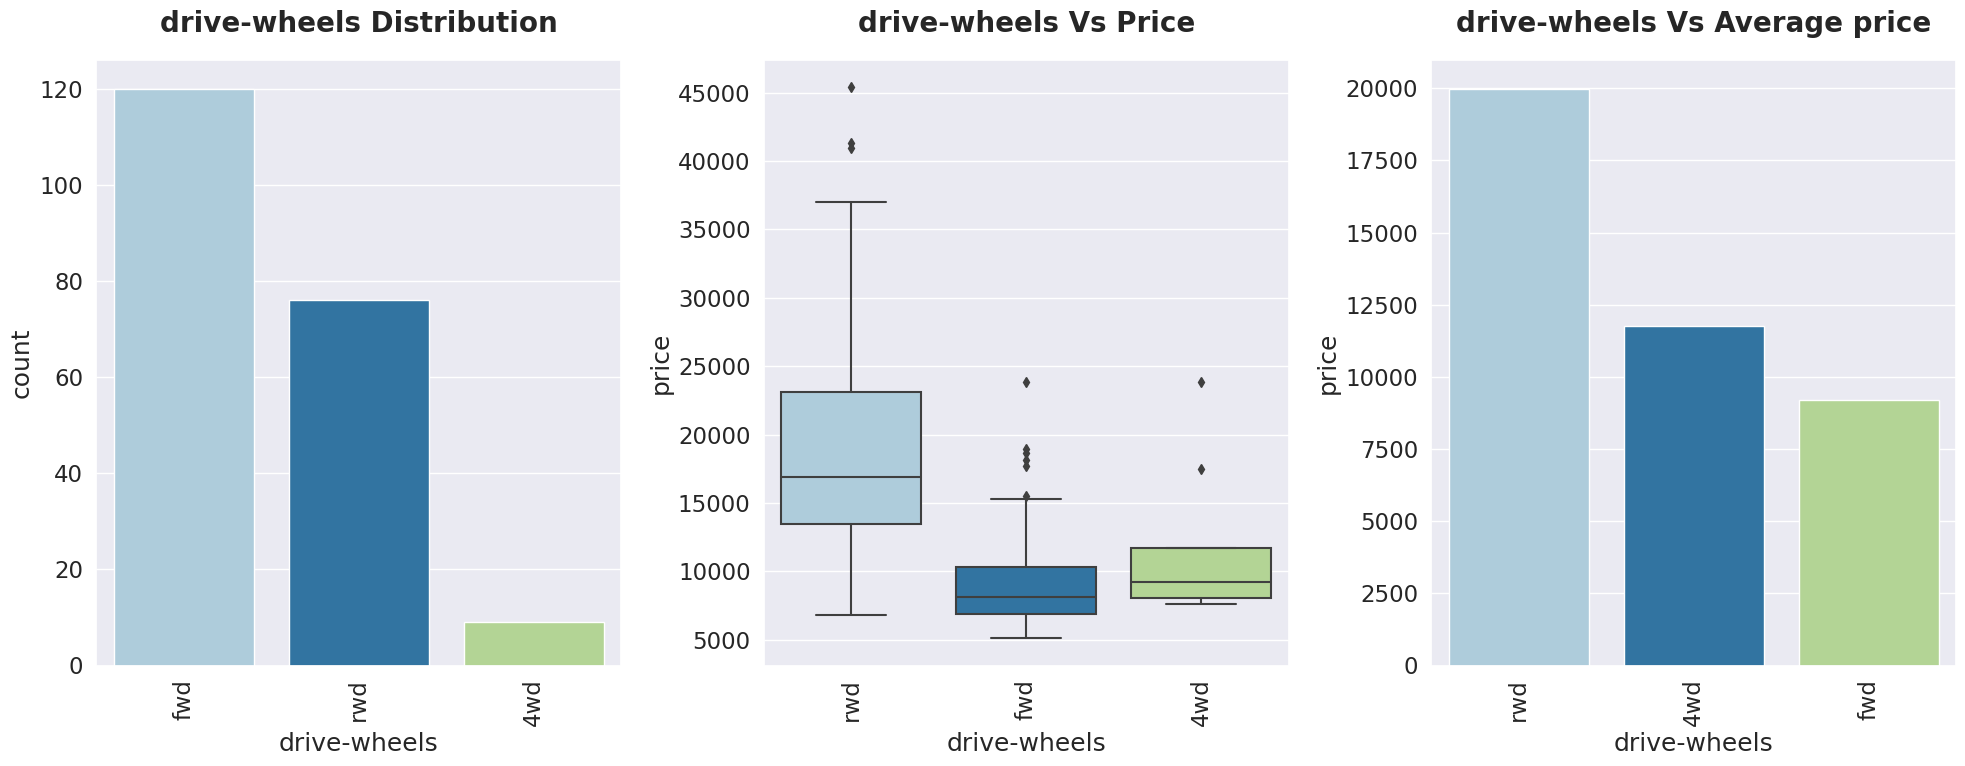

In [782]:
Categorical_visualization('drive-wheels')

**Observation**
*  Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
* Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

**Insights**
* We can make an insight that the high rated cars must be using Rear Wheel Drive.
* Cars with low prices must be using Forward Wheel Drive

### **Visualizing Engine-location Feature**

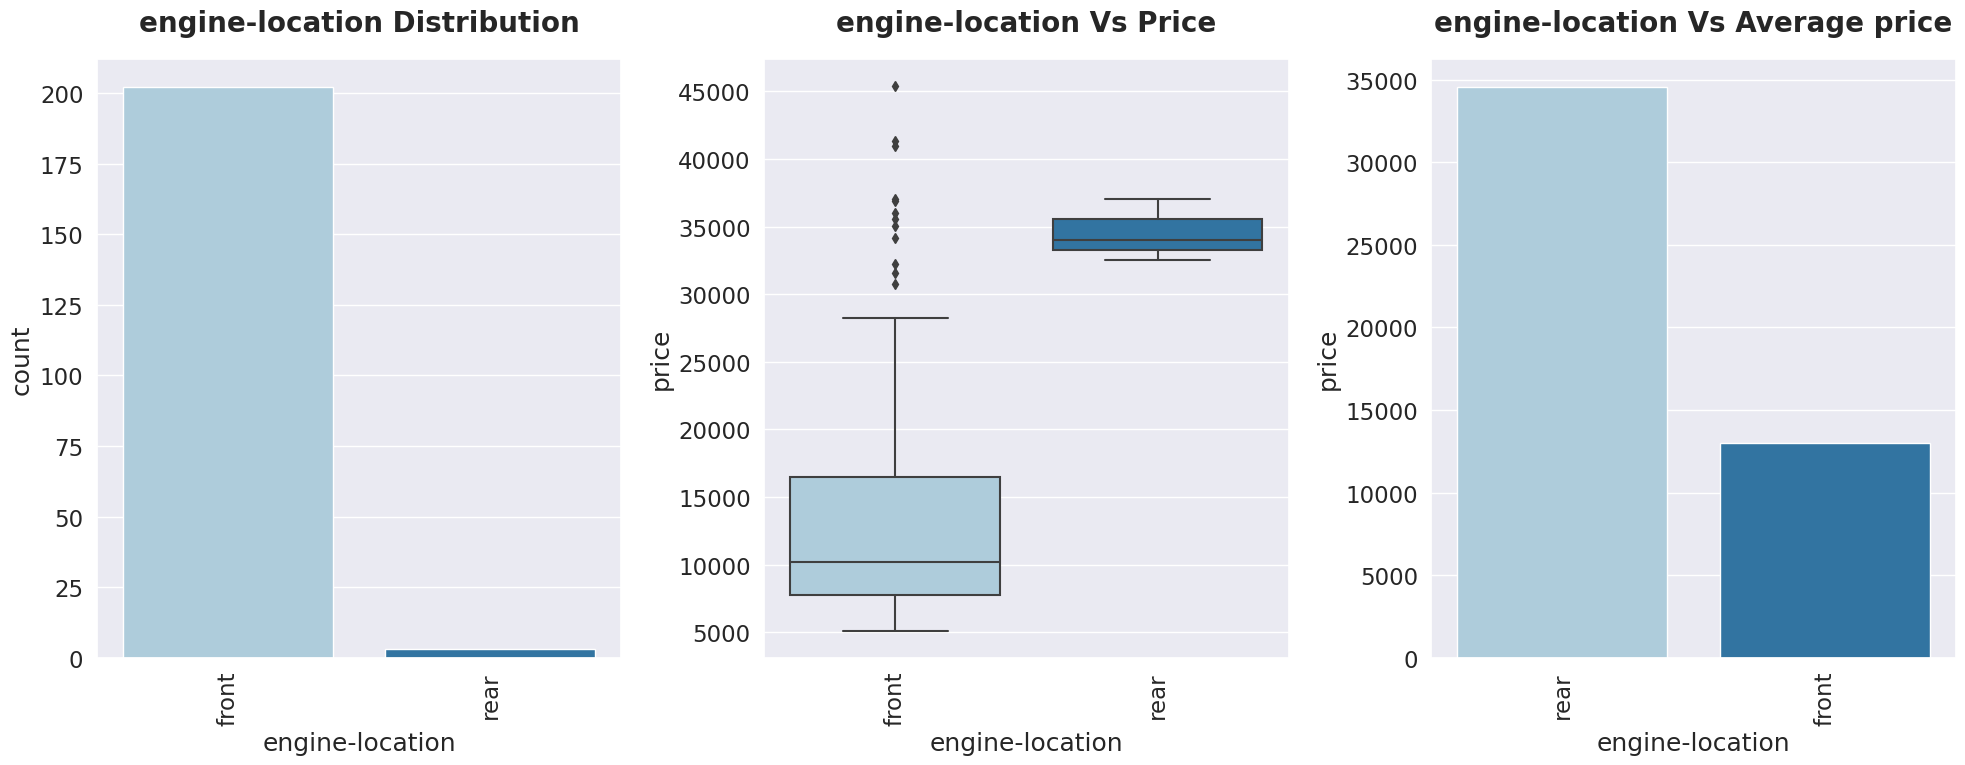

In [783]:
Categorical_visualization('engine-location')

In [784]:
df[df["engine-location"]=="rear"]

symboling     make fuel-type aspiration num-of-doors   body-style  \
126          3  porsche       gas        std          two      hardtop   
127          3  porsche       gas        std          two      hardtop   
128          3  porsche       gas        std          two  convertible   

    drive-wheels engine-location  wheel-base  length  width  height  \
126          rwd            rear        89.5   168.9   65.0    51.6   
127          rwd            rear        89.5   168.9   65.0    51.6   
128          rwd            rear        89.5   168.9   65.0    51.6   

     curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
126         2756        ohcf              six          194        mpfi  3.74   
127         2756        ohcf              six          194        mpfi  3.74   
128         2800        ohcf              six          194        mpfi  3.74   

     stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
126     2.9                9.5         207      5900        17           25   
127     2.9                9.5         207      5900        17           25   
128     2.9                9.5         207      5900        17           25   

       price  
126  32528.0  
127  34028.0  
128  37028.0

**Observation**

* Most of the cars are having engine location in front.

**Insights**

* Note there are only 3 data-points for the rear category.
* So we can't make any inference of car price when compared with engine location.
* If we want we can drop this feature before training as it may lead to overfitting.

### **Visualizing Engine-type Feature**

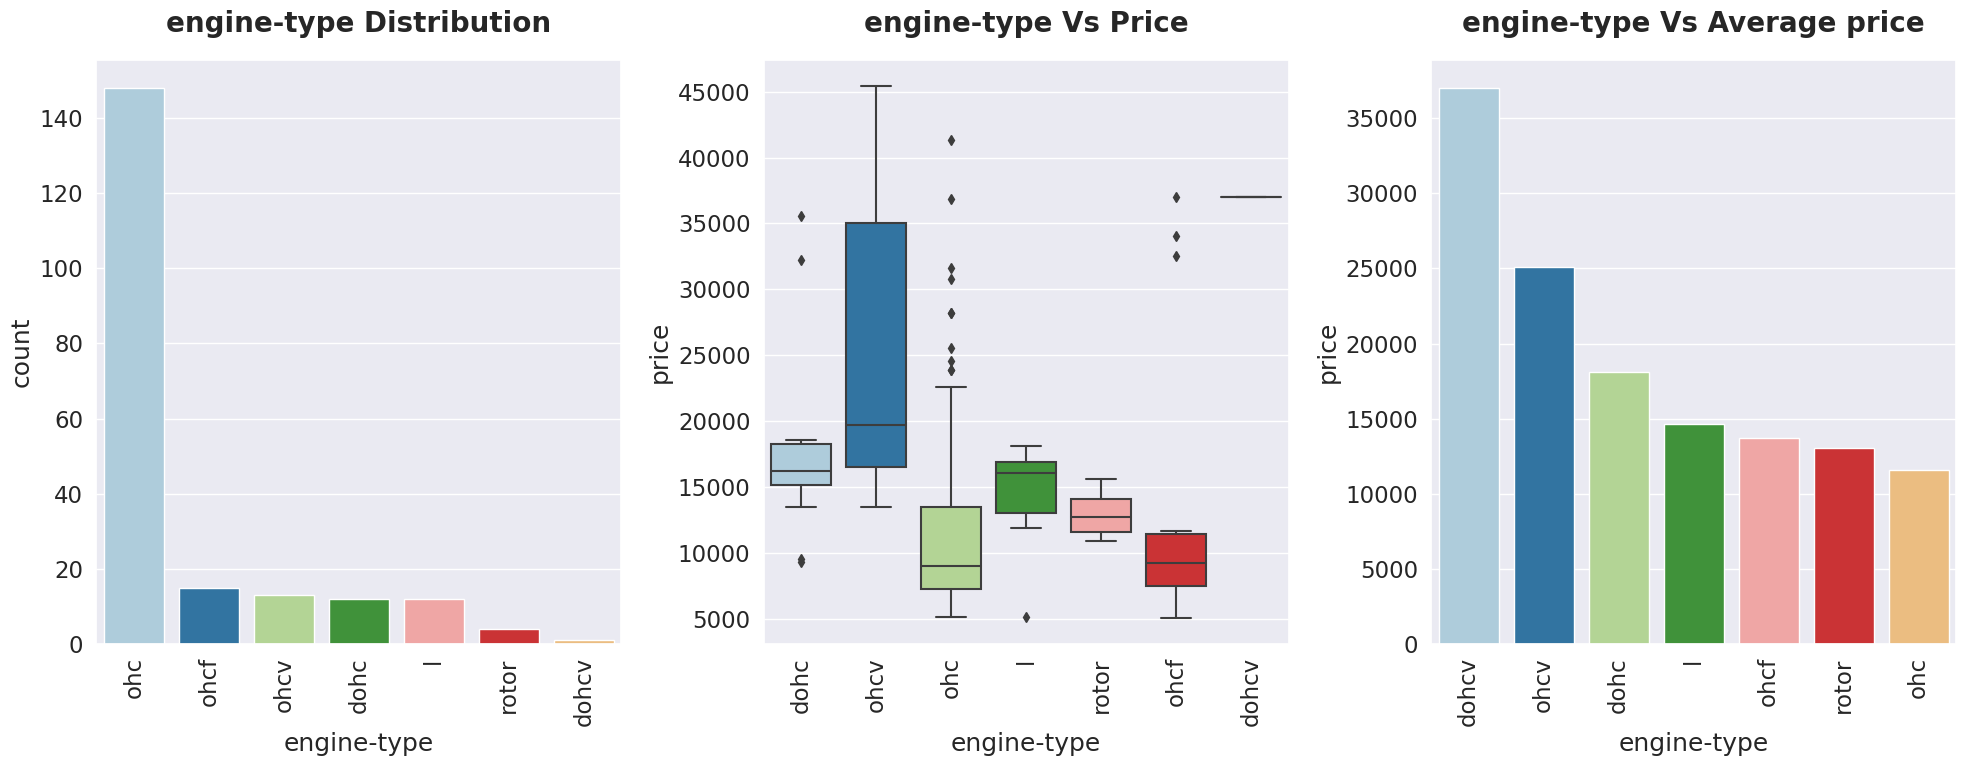

In [785]:
Categorical_visualization('engine-type')

In [786]:
df[df["engine-type"]=="dohcv"]

symboling     make fuel-type aspiration num-of-doors body-style  \
129          1  porsche       gas        std          two  hatchback   

    drive-wheels engine-location  wheel-base  length  width  height  \
129          rwd           front        98.4   175.7   72.3    50.5   

     curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
129         3366       dohcv            eight          203        mpfi  3.94   

     stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
129    3.11               10.0         288      5750        17           28   

       price  
129  37028.0

**Insights**
* Cars having Overhead Camshaft (OHC) engines are mostly sold.
* Only one car has been sold having engine type dohcv.
* There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
* Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

### **Visualizing Num-of-cylinders Feature**

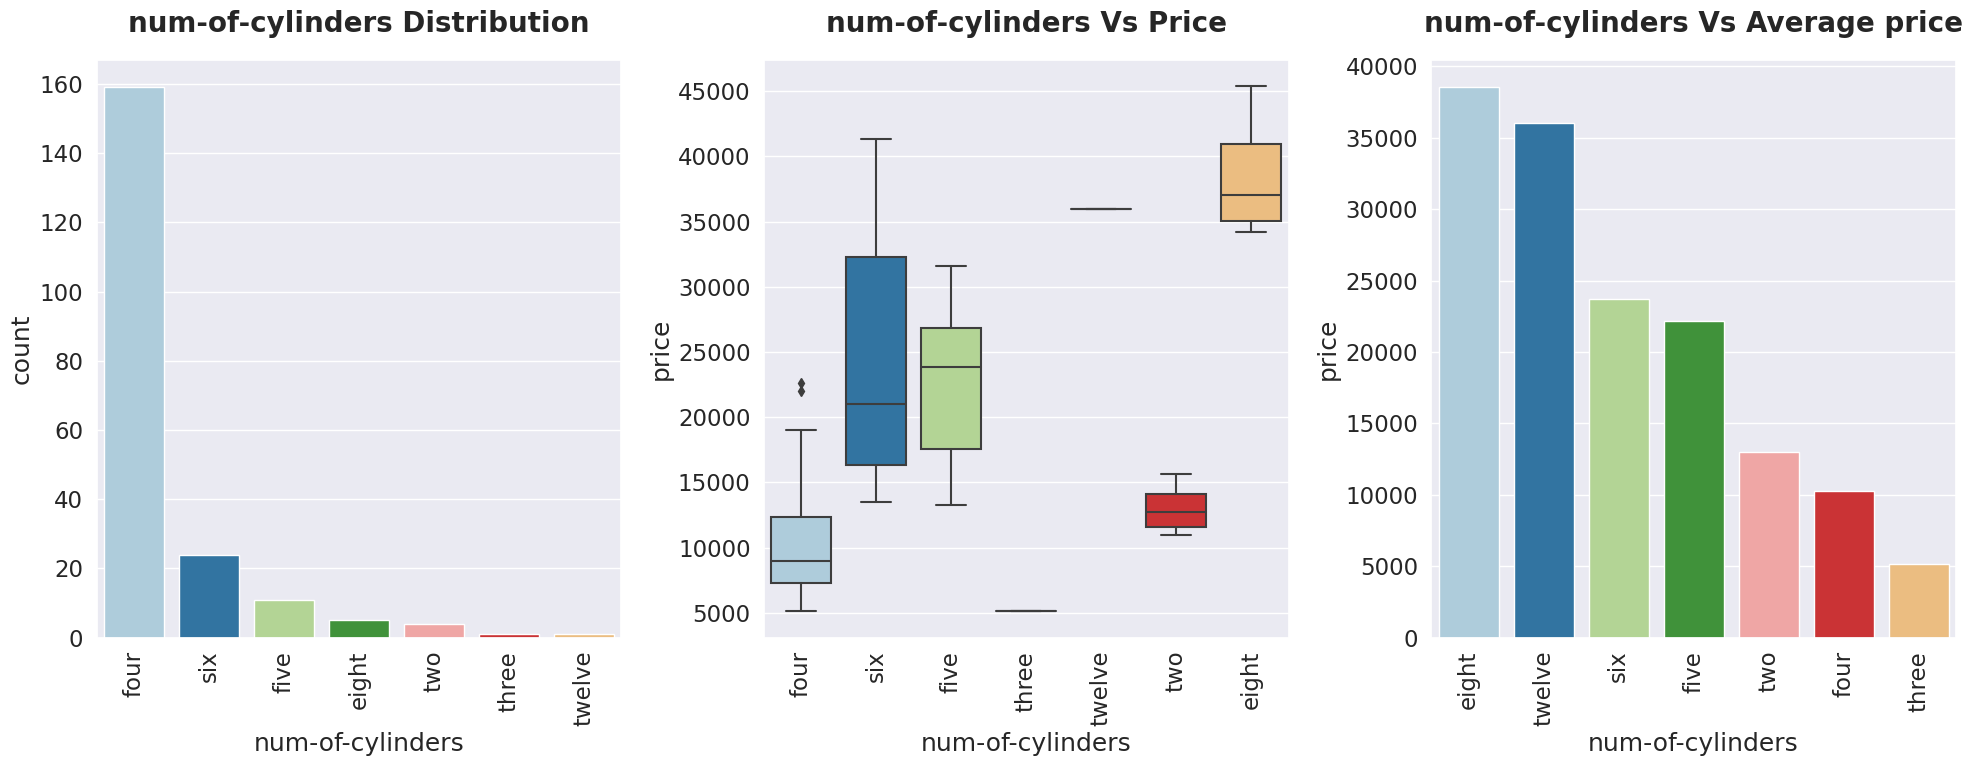

In [787]:
Categorical_visualization('num-of-cylinders')

In [788]:
df[df['num-of-cylinders'] == 'three']

symboling       make fuel-type aspiration num-of-doors body-style  \
18          2  chevrolet       gas        std          two  hatchback   

   drive-wheels engine-location  wheel-base  length  width  height  \
18          fwd           front        88.4   141.1   60.3    53.2   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
18         1488           l            three           61        2bbl  2.91   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
18    3.03                9.5          48      5100        47           53   

     price  
18  5151.0

In [789]:
df[df['num-of-cylinders'] == 'twelve']

symboling    make fuel-type aspiration num-of-doors body-style  \
49          0  jaguar       gas        std          two      sedan   

   drive-wheels engine-location  wheel-base  length  width  height  \
49          rwd           front       102.0   191.7   70.6    47.8   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
49         3950        ohcv           twelve          326        mpfi  3.54   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
49    2.76               11.5         262      5000        13           17   

      price  
49  36000.0

**Insights**

* Most of the cars are having Four cyclinders followed by cars having six cyclinders.
* There are only one data-point each for car having Three & Twelve data-points.
Cars having eight cyclinders are most expensive cars followed by six cyclinders.

### **Visualizing Fuel-system Feature**

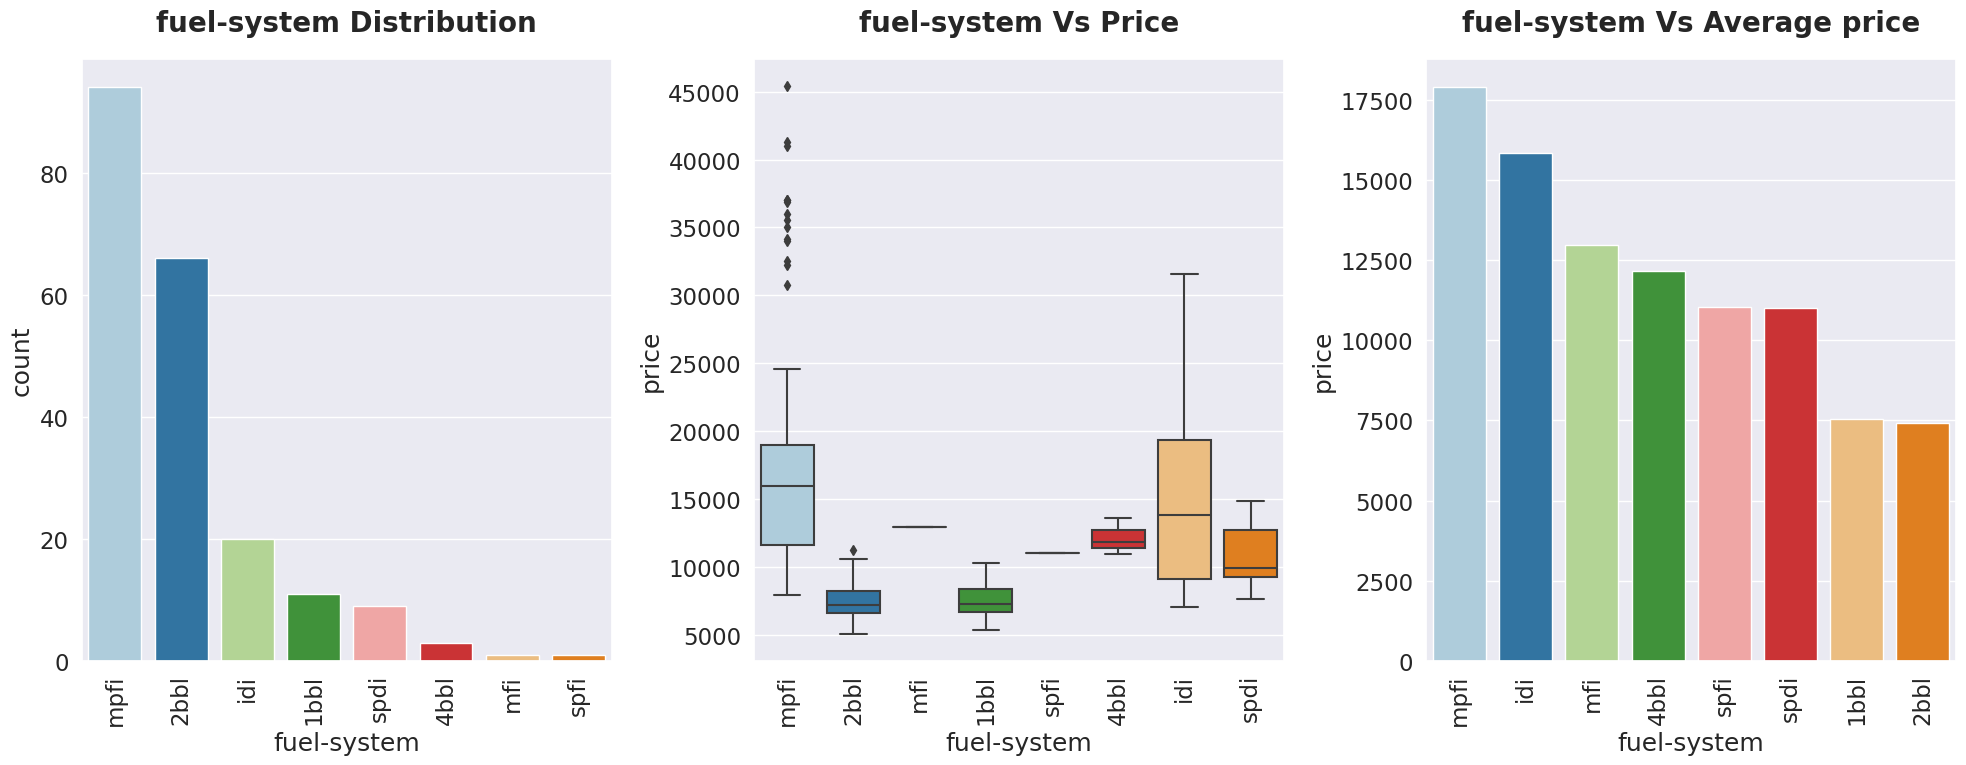

In [790]:
Categorical_visualization('fuel-system')

In [791]:
df[df["fuel-system"]=="mfi"]

symboling   make fuel-type aspiration num-of-doors body-style  \
29          3  dodge       gas      turbo          two  hatchback   

   drive-wheels engine-location  wheel-base  length  width  height  \
29          fwd           front        95.9   173.2   66.3    50.2   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
29         2811         ohc             four          156         mfi   3.6   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
29     3.9                7.0         145      5000        19           24   

      price  
29  12964.0

In [792]:
df[df["fuel-system"]=="spfi"]

symboling   make fuel-type aspiration num-of-doors body-style  \
46          2  isuzu       gas        std          two  hatchback   

   drive-wheels engine-location  wheel-base  length  width  height  \
46          rwd           front        96.0   172.6   65.2    51.4   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
46         2734         ohc             four          119        spfi  3.43   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
46    3.23                9.2          90      5000        24           29   

      price  
46  11048.0

**Insight**
* Most of the cars are having mpfi & 2bbl fuelsystems.
* Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
* There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

### **Visualizing Symboling Feature**

* The symboling represents the degree to which the car is riskier than its price suggests.
* It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
* In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

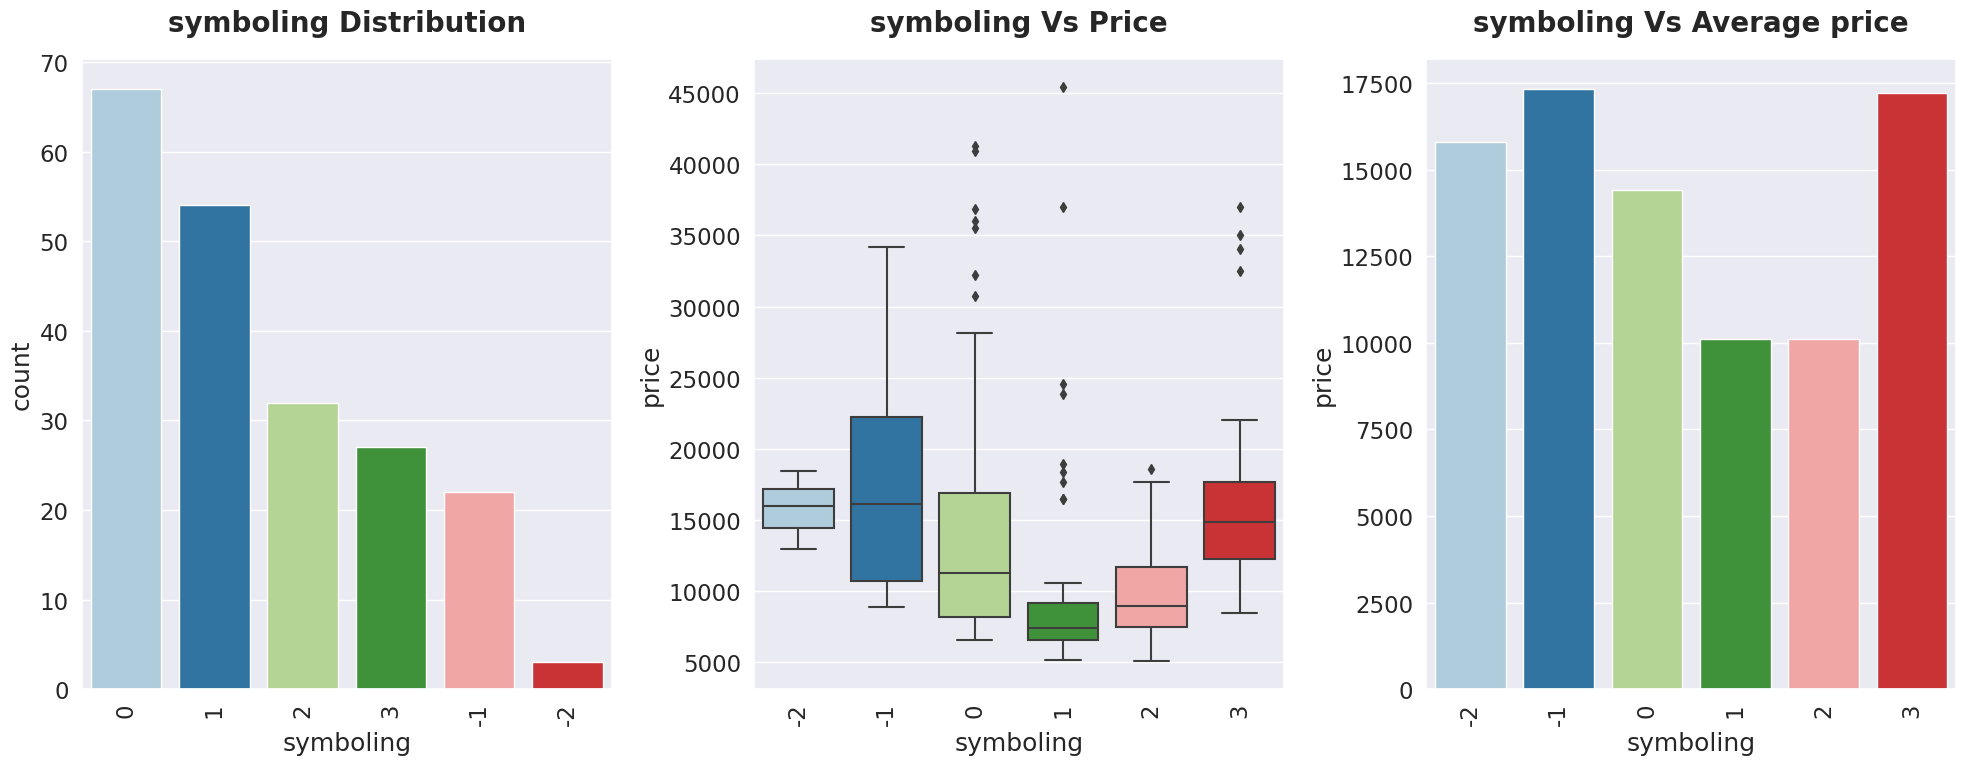

In [793]:
Categorical_visualization('symboling')

**Insights**
* We can clearly observe cars having symboling 0 or 1 are motly preferred.
* We can aslo observe that symboling -1, 0, 3 are expensive.

## **Visualizing Numerical Features**

In [794]:
num_cols = df.select_dtypes(include =[np.number])
num_cols.head()

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
3          2        99.8   176.6   66.2    54.3         2337          109   
4          2        99.4   176.6   66.4    54.3         2824          136   

   bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  3.47    2.68                9.0         111      5000        21   
1  3.47    2.68                9.0         111      5000        21   
2  2.68    3.47                9.0         154      5000        19   
3  3.19    3.40               10.0         102      5500        24   
4  3.19    3.40                8.0         115      5500        18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0

<Figure size 3000x3000 with 0 Axes>

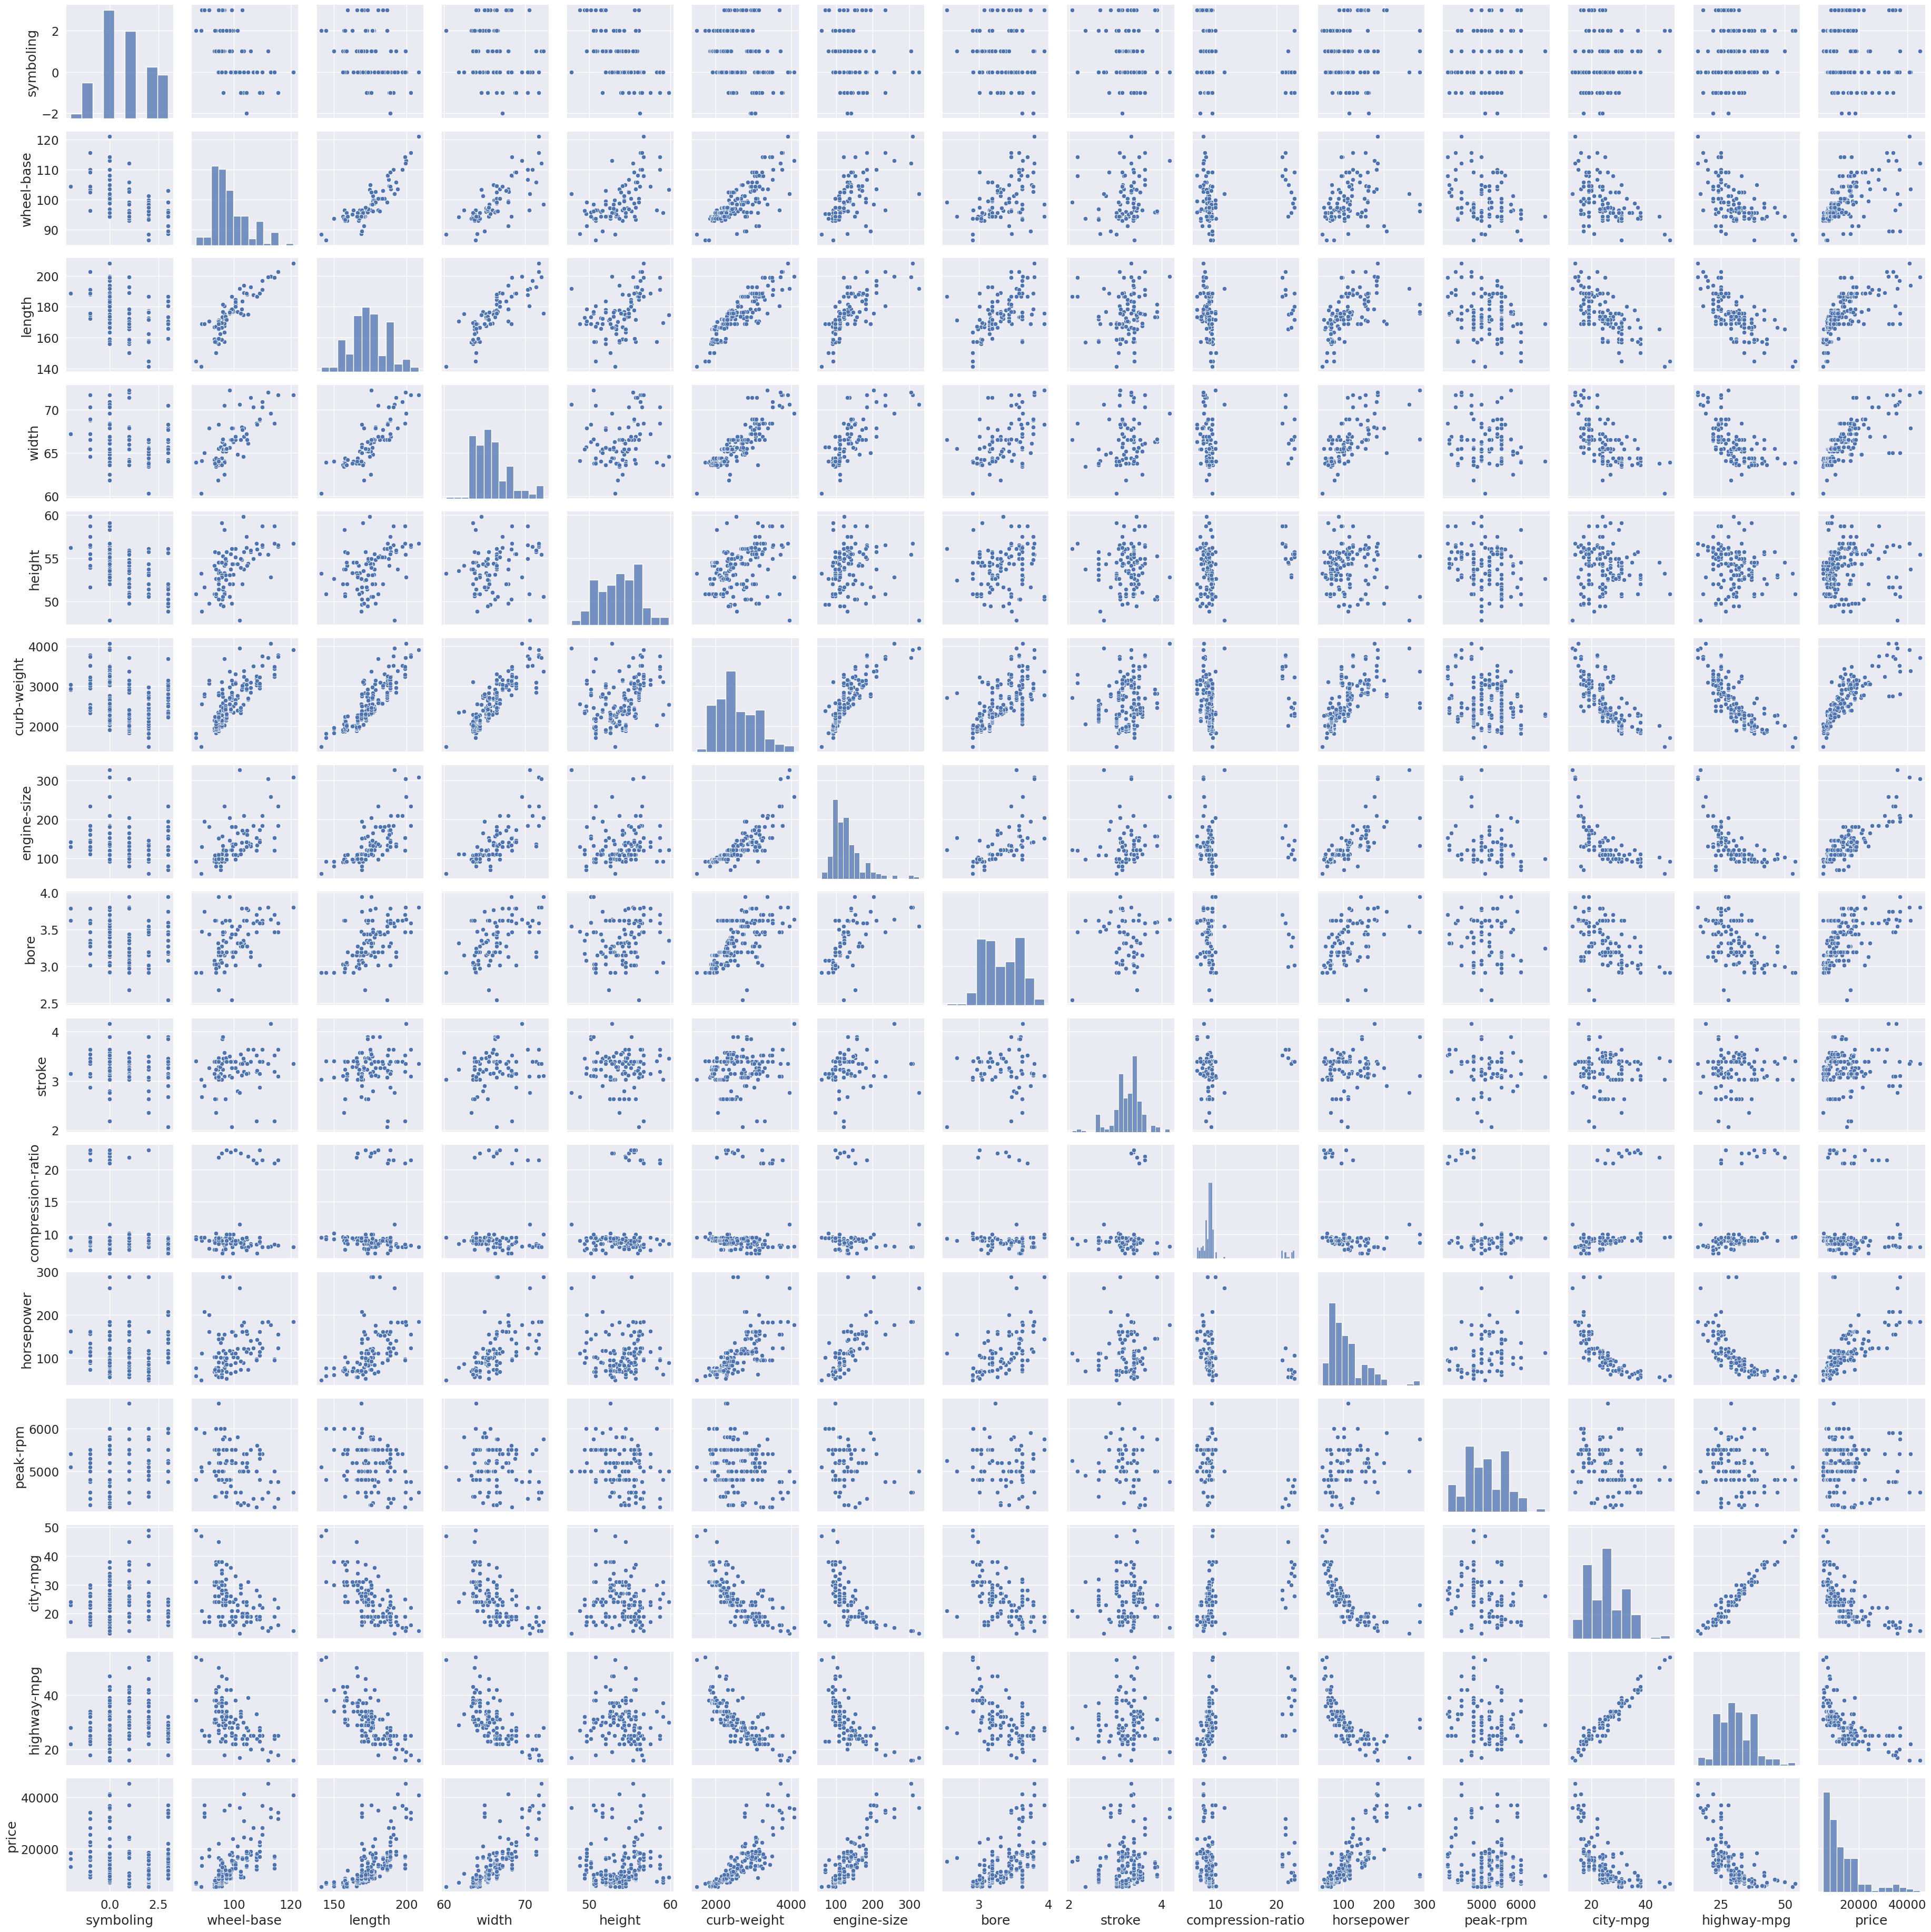

In [850]:
# Pairplot of all numerical features
plt.figure(figsize = (30,30))
sns.pairplot(num_cols)
plt.show()

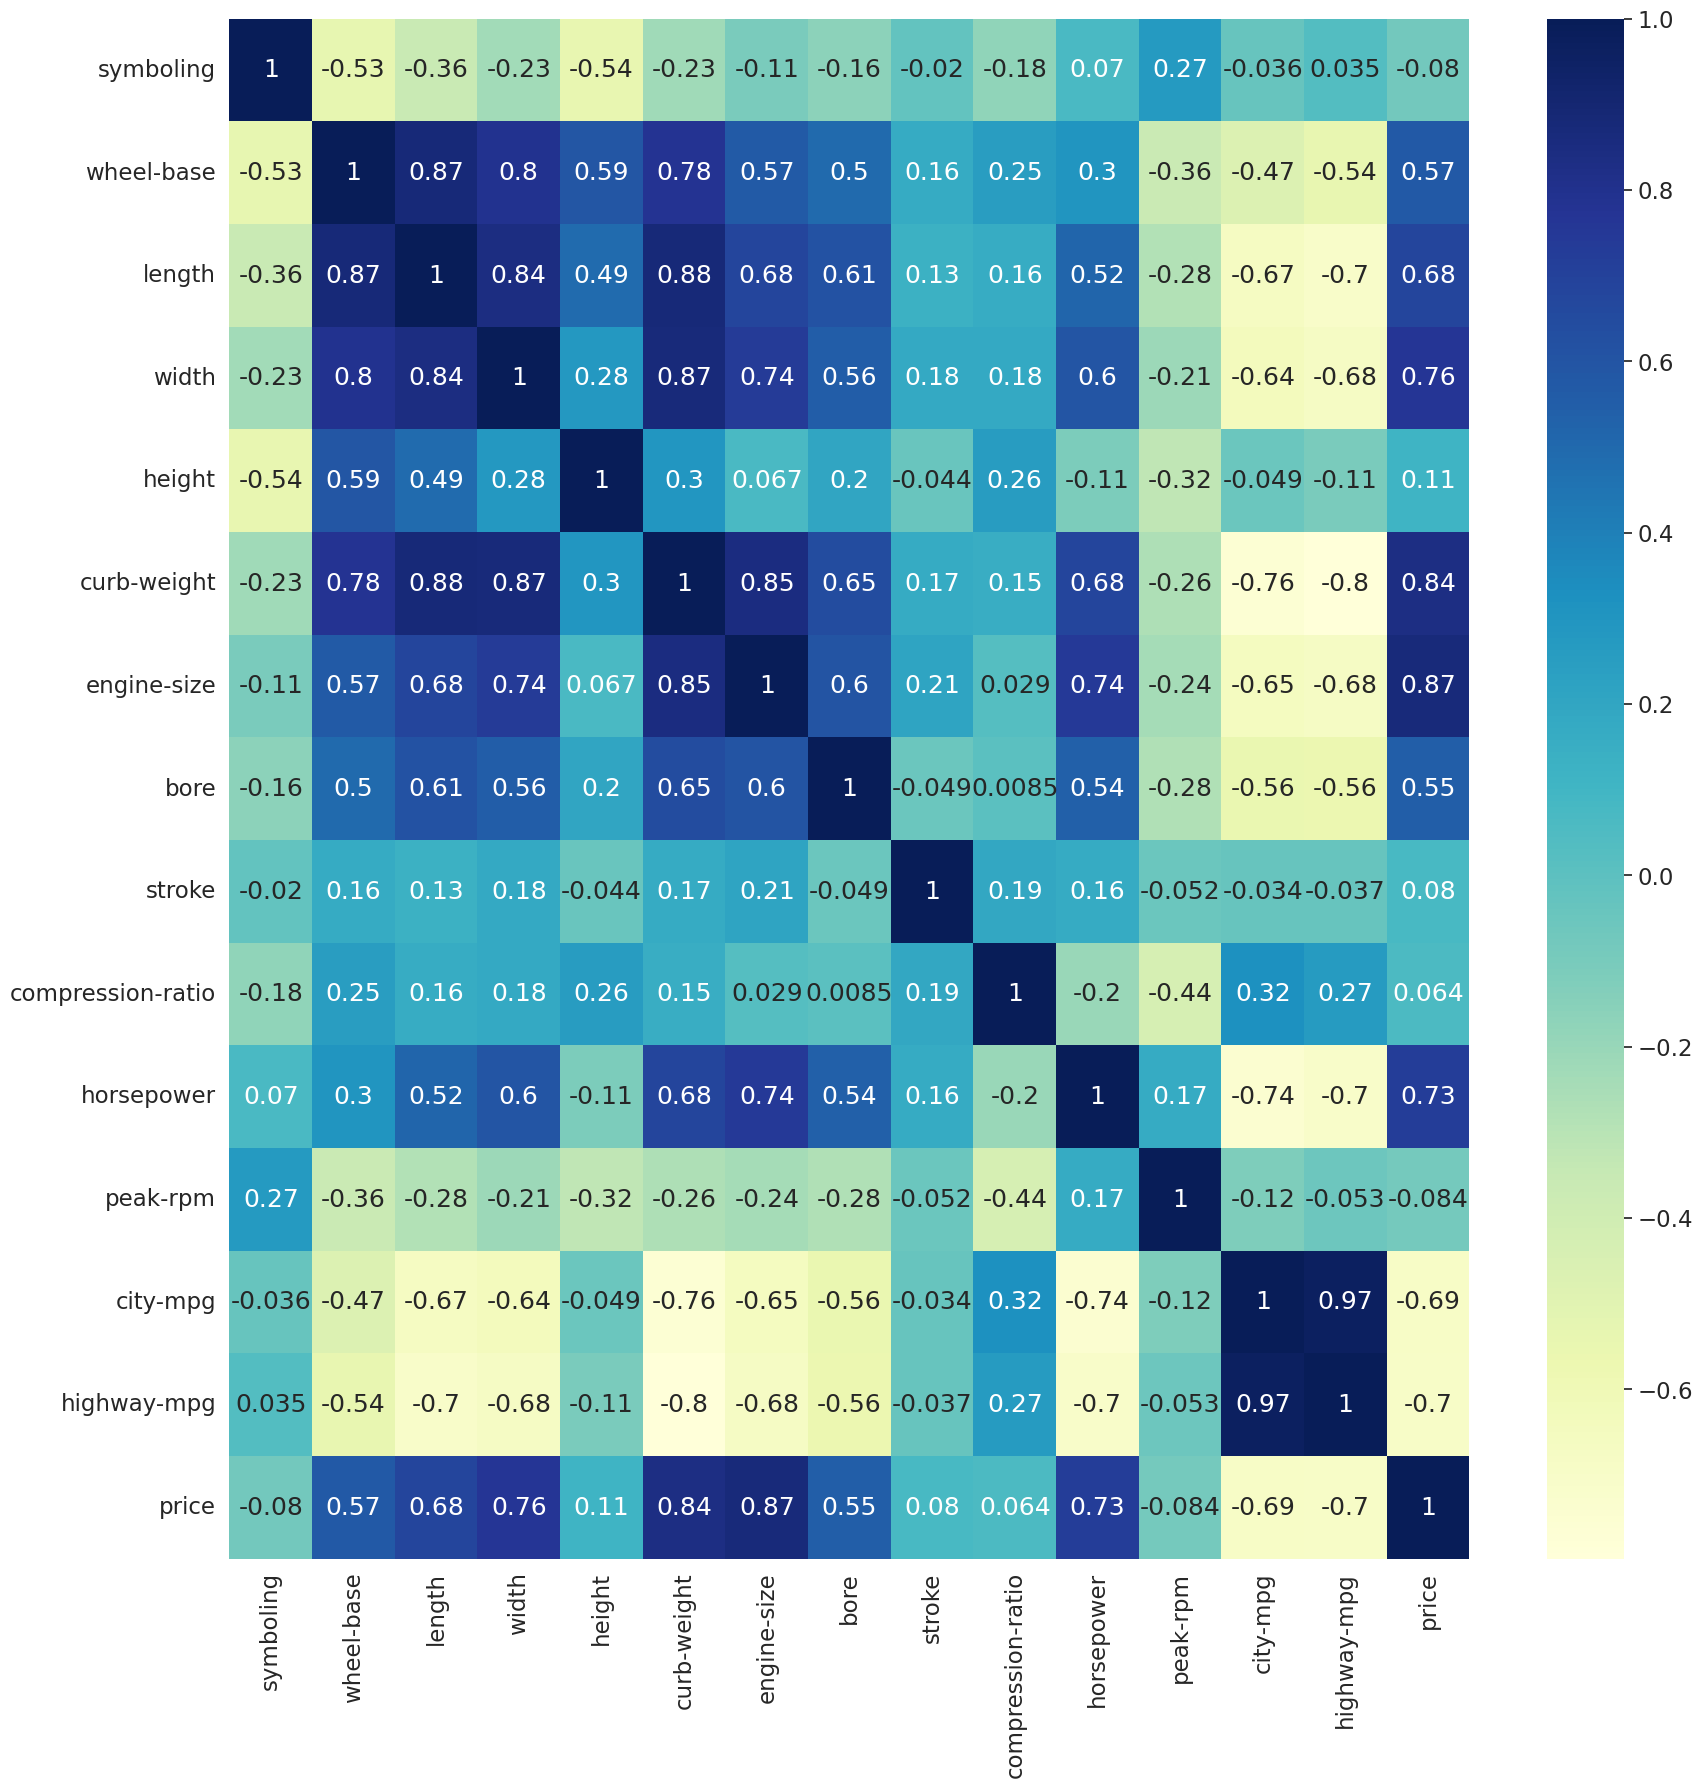

In [796]:
# Heatmap of all numerical features
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

### **Correlation of Numerical features with Price(Target variable)**

In [797]:
numeric_features = df.select_dtypes(include=[np.number])
cor = numeric_features.corr()
print(cor['price'].sort_values(ascending = False),'\n')

price                1.000000
engine-size          0.870751
curb-weight          0.835657
width                0.764977
horsepower           0.725481
length               0.678818
wheel-base           0.571784
bore                 0.549438
height               0.112421
stroke               0.079775
compression-ratio    0.064381
symboling           -0.080149
peak-rpm            -0.083675
city-mpg            -0.690580
highway-mpg         -0.698389
Name: price, dtype: float64 



* Price is highly (positively) correlated with wheelbase, length, width, curb-weight, engine-size, horsepower.
* There are many independent variables which are highly correlated: wheel-base, length, curb-weight, engine-size etc.. all are positively correlated.
* Price is negatively correlated to symboling, city-mpg and highway-mpg.

In [798]:
def Scatter_Plot(cols):
  x = 1
  plt.figure(figsize=(20,8))
  for i in cols:
    plt.subplot(1,3,x)
    sns.scatterplot(x=i, y='price', data=df, color='blue')
    plt.title(f'{i} vs Price', fontweight= 'black', fontsize= 20, pad=20 )
    plt.tight_layout()
    x += 1

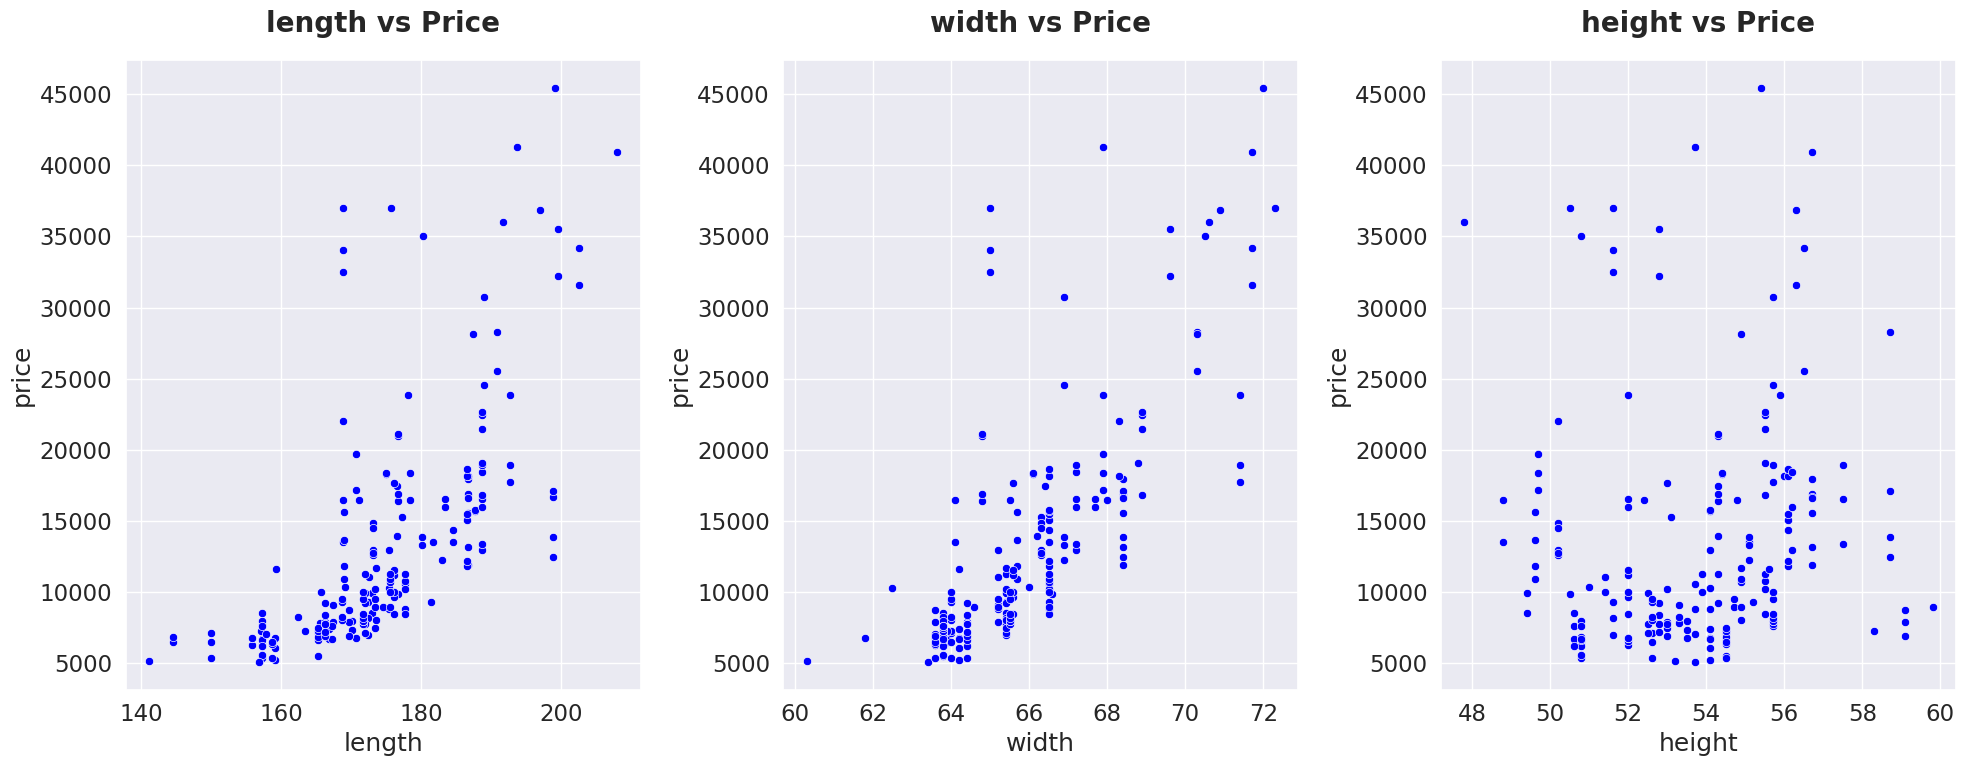

In [799]:
Scatter_Plot(['length', 'width', 'height'])

**Insights**

* We can clearly observe that length & width features are highly correlated with the price feature.
* So we can make an insight that with increment in length & width of the car there is an increment in price too.
* From length vs price we can't make any inference as the data-points are too scattered.
* Since CarHeight is not affecting Price We can drop this feature.

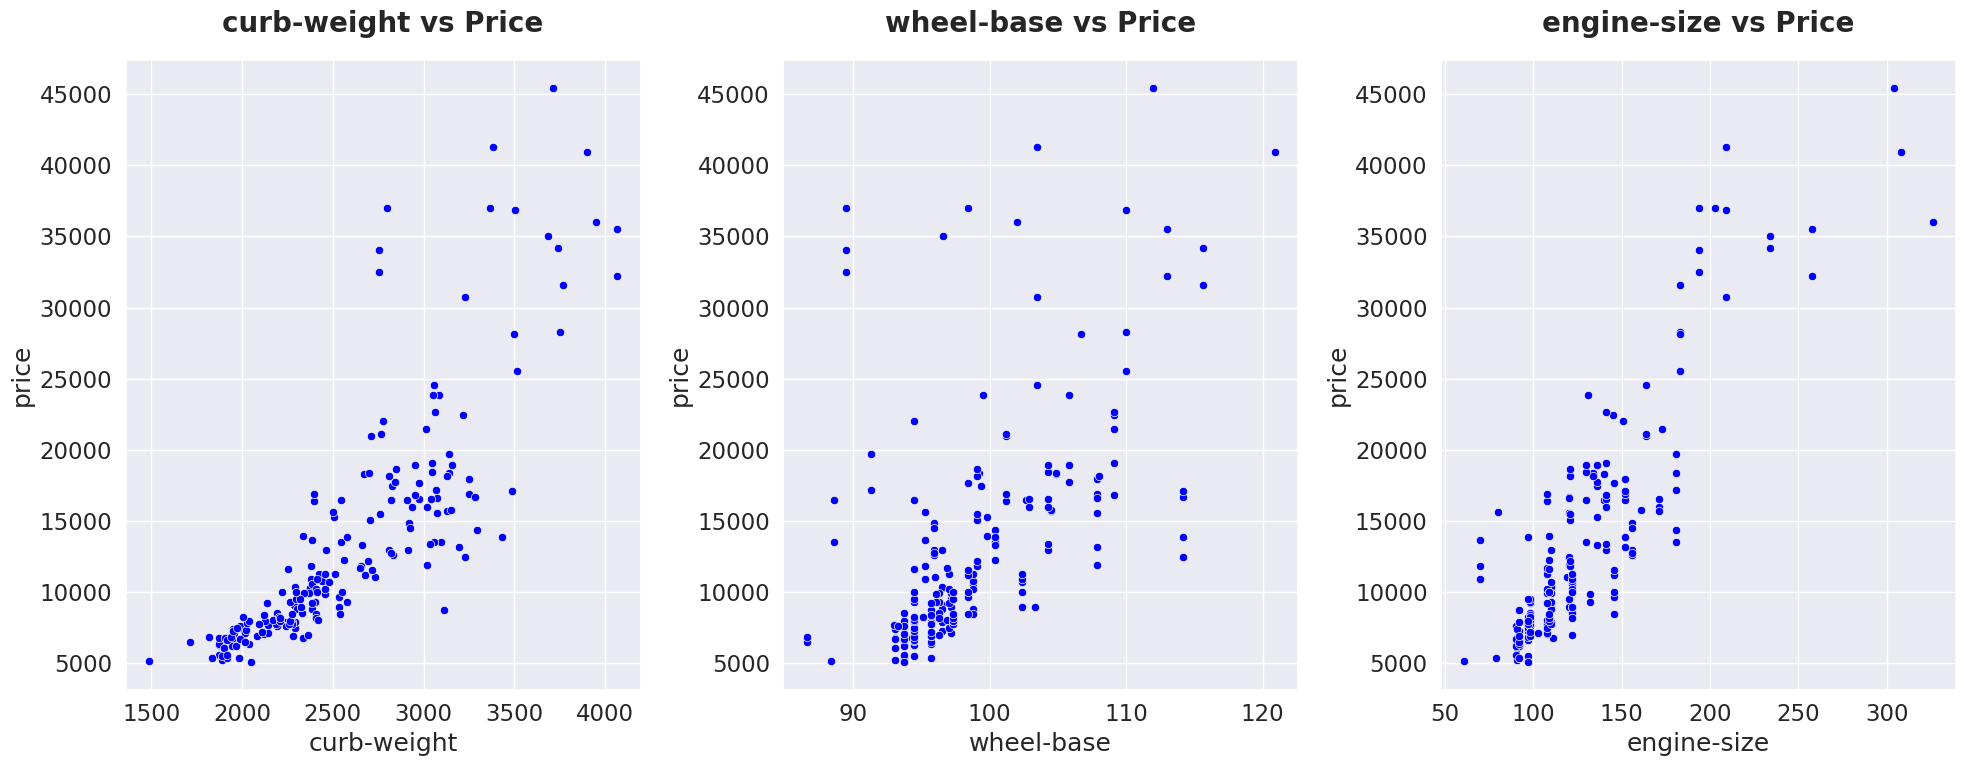

In [800]:
Scatter_Plot(['curb-weight', 'wheel-base', 'engine-size'])

**Insights**
* We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
* From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.
* We can clearly observe that engine-size is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.

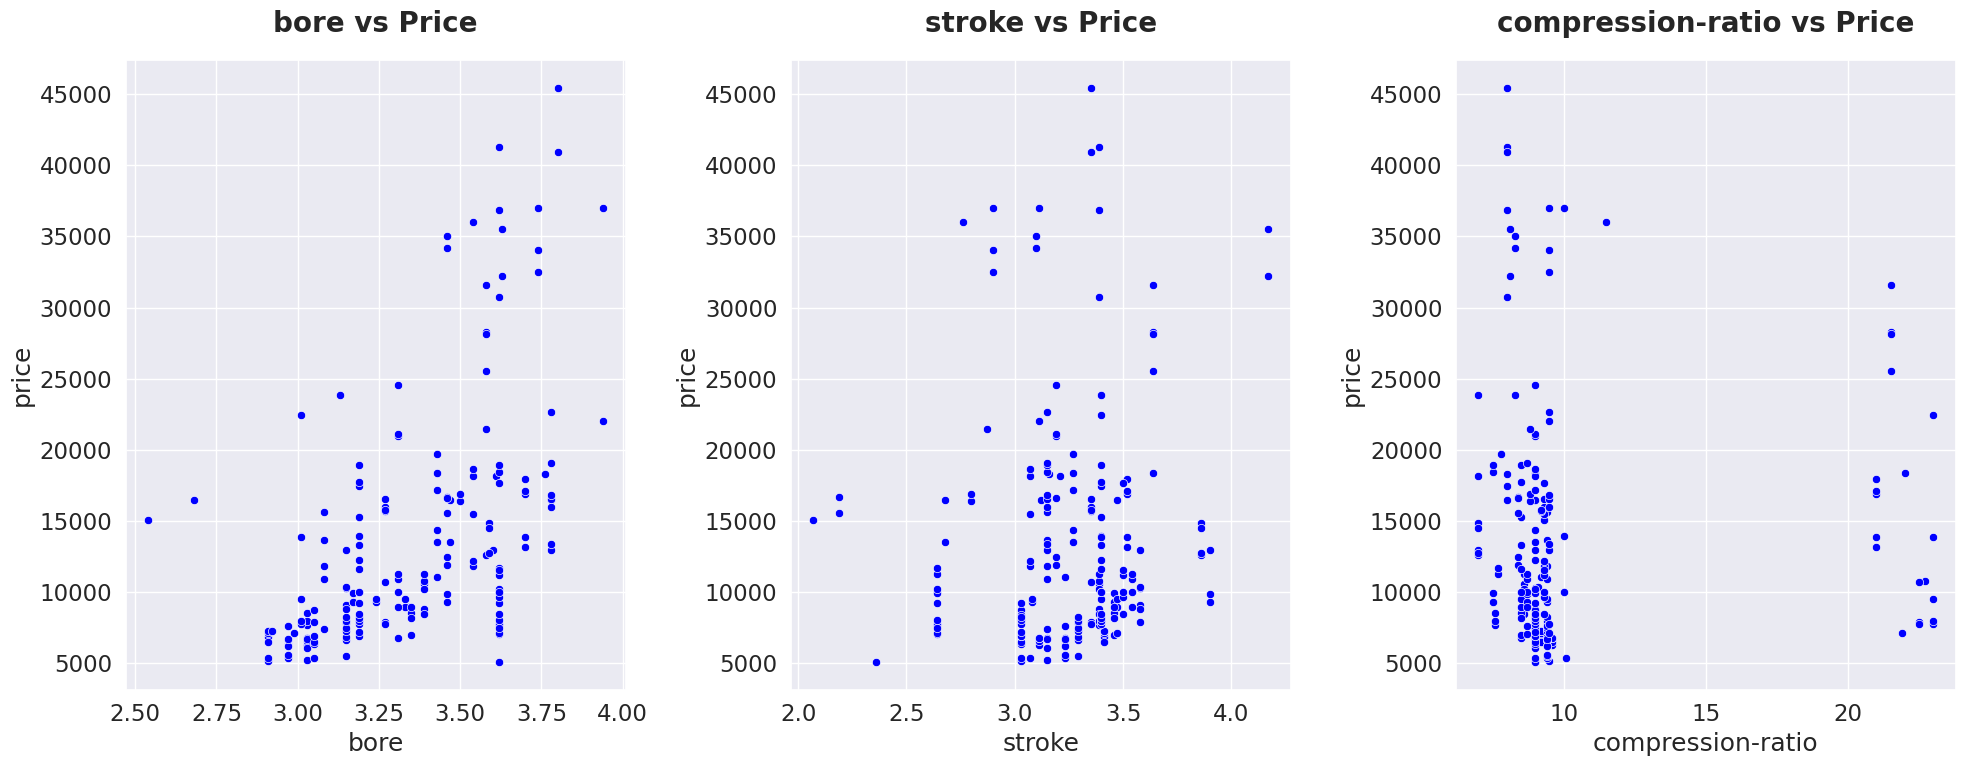

In [801]:
Scatter_Plot(['bore', 'stroke', 'compression-ratio'])

**Insights**

* From Bore vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
* From Stroke vs Price we can't make any inference as the data-points are too scattered.
* Since Stroke is not affecting Price that much. We can drop this feature.
From Compressionratio vs Price visual we can't make any inference as the data-points are too scattered.

In [802]:
def Scatter_Plot_(cols):
  x = 1
  plt.figure(figsize=(15,6))
  for i in cols:
    plt.subplot(1,2,x)
    sns.scatterplot(x=i, y='price', data=df, color='blue')
    plt.title(f'{i} vs Price', fontweight= 'black', fontsize= 20, pad=20 )
    plt.tight_layout()
    x += 1

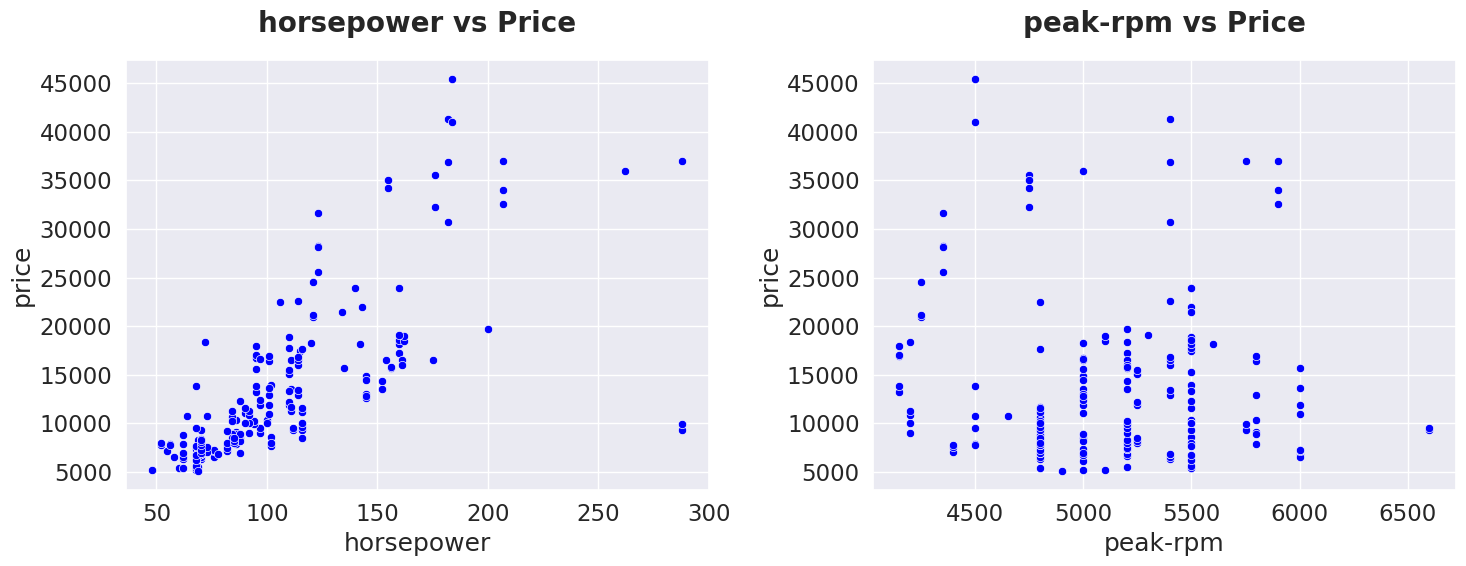

In [803]:
Scatter_Plot_(['horsepower', 'peak-rpm'])

**Insights**
* We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
* Peakrpm is not affecting price. So we can drop this features.

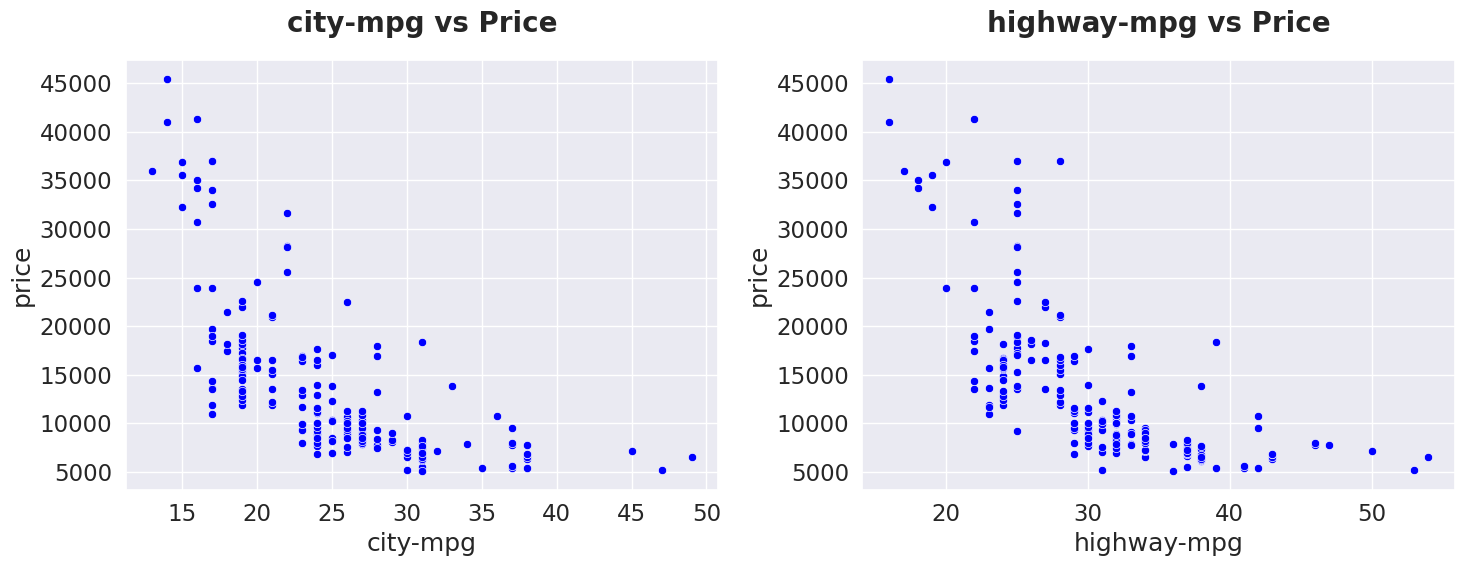

In [804]:
Scatter_Plot_(['city-mpg', 'highway-mpg'])

**Insights**

* We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
* So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
* So our both Citympg & Highwaympg are useful features for price prediction.

## **Analysis Report**

* Diesel cars are priced more than gas cars
* Cars with turbo aspiration engine are priced more than standard ones.
* Number of doors doesn't seem to have much effect on price.
* Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.
* Cars with Rear wheel drive have a higher price value.
* DOHCV and OHCV engine types are priced high.
* Eight and twelve cylinder cars have higher price.
* IDI and MPFI fuel system have higher price.
* When increasing cylinder number the price increasing
* When incresing engine size the price will increasing.

In [805]:
df.head()

symboling         make fuel-type aspiration num-of-doors   body-style  \
0          3  alfa-romero       gas        std          two  convertible   
1          3  alfa-romero       gas        std          two  convertible   
2          1  alfa-romero       gas        std          two    hatchback   
3          2         audi       gas        std         four        sedan   
4          2         audi       gas        std         four        sedan   

  drive-wheels engine-location  wheel-base  length  width  height  \
0          rwd           front        88.6   168.8   64.1    48.8   
1          rwd           front        88.6   168.8   64.1    48.8   
2          rwd           front        94.5   171.2   65.5    52.4   
3          fwd           front        99.8   176.6   66.2    54.3   
4          4wd           front        99.4   176.6   66.4    54.3   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2548        dohc             four          130        mpfi  3.47   
1         2548        dohc             four          130        mpfi  3.47   
2         2823        ohcv              six          152        mpfi  2.68   
3         2337         ohc             four          109        mpfi  3.19   
4         2824         ohc             five          136        mpfi  3.19   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    2.68                9.0         111      5000        21           27   
1    2.68                9.0         111      5000        21           27   
2    3.47                9.0         154      5000        19           26   
3    3.40               10.0         102      5500        24           30   
4    3.40                8.0         115      5500        18           22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

we need to change the dat type from object to number

In [807]:
cat_columns = df.select_dtypes(exclude=[np.number])
cat_columns.head()

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front        dohc             four        mpfi  
1           front        dohc             four        mpfi  
2           front        ohcv              six        mpfi  
3           front         ohc             four        mpfi  
4           front         ohc             five        mpfi

In [808]:
cat_col = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i in cat_col:
  le = LabelEncoder()
  le.fit(df[i])
  df[i] = le.transform(df[i])

In [809]:
df.head()

symboling  make  fuel-type  aspiration  num-of-doors  body-style  \
0          3     0          1           0             1           0   
1          3     0          1           0             1           0   
2          1     0          1           0             1           2   
3          2     1          1           0             0           3   
4          2     1          1           0             0           3   

   drive-wheels  engine-location  wheel-base  length  width  height  \
0             2                0        88.6   168.8   64.1    48.8   
1             2                0        88.6   168.8   64.1    48.8   
2             2                0        94.5   171.2   65.5    52.4   
3             1                0        99.8   176.6   66.2    54.3   
4             0                0        99.4   176.6   66.4    54.3   

   curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  \
0         2548            0                 2          130            5  3.47   
1         2548            0                 2          130            5  3.47   
2         2823            5                 3          152            5  2.68   
3         2337            3                 2          109            5  3.19   
4         2824            3                 1          136            5  3.19   

   stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0    2.68                9.0         111      5000        21           27   
1    2.68                9.0         111      5000        21           27   
2    3.47                9.0         154      5000        19           26   
3    3.40               10.0         102      5500        24           30   
4    3.40                8.0         115      5500        18           22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    int64  
 2   fuel-type          205 non-null    int64  
 3   aspiration         205 non-null    int64  
 4   num-of-doors       205 non-null    int64  
 5   body-style         205 non-null    int64  
 6   drive-wheels       205 non-null    int64  
 7   engine-location    205 non-null    int64  
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    int64  
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [811]:
df.shape

(205, 25)

In [812]:
df.corr()['price'].sort_values()

highway-mpg         -0.698389
city-mpg            -0.690580
make                -0.154215
fuel-type           -0.102733
body-style          -0.088995
peak-rpm            -0.083675
symboling           -0.080149
num-of-cylinders    -0.041027
num-of-doors        -0.018002
engine-type          0.041964
compression-ratio    0.064381
stroke               0.079775
height               0.112421
aspiration           0.182781
engine-location      0.319873
fuel-system          0.528433
bore                 0.549438
drive-wheels         0.566840
wheel-base           0.571784
length               0.678818
horsepower           0.725481
width                0.764977
curb-weight          0.835657
engine-size          0.870751
price                1.000000
Name: price, dtype: float64

feature engineering

In [813]:
feature_sel = df.copy()

In [814]:
X1 = feature_sel.drop(['price'],axis=1)
y1 = feature_sel['price']

In [815]:
fs_rf = RandomForestRegressor()
rfe = RFE(estimator=fs_rf, n_features_to_select=18, step=1)
rfe = rfe.fit(X1,y1)
print("Best 18 feature : ",X1.columns[rfe.support_])

Best 18 feature :  Index(['symboling', 'make', 'aspiration', 'body-style', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')


In [816]:
final_df = df[['fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
               'engine-type','num-of-cylinders','fuel-system','wheel-base','length',
               'width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg','price']]

In [817]:
final_df.head(2)

fuel-type  aspiration  num-of-doors  body-style  drive-wheels  engine-type  \
0          1           0             1           0             2            0   
1          1           0             1           0             2            0   

   num-of-cylinders  fuel-system  wheel-base  length  width  curb-weight  \
0                 2            5        88.6   168.8   64.1         2548   
1                 2            5        88.6   168.8   64.1         2548   

   engine-size  bore  horsepower  highway-mpg  city-mpg    price  
0          130  3.47         111           27        21  13495.0  
1          130  3.47         111           27        21  16500.0

In [818]:
X = final_df.drop(['price'], axis=1)
y = final_df['price']

In [819]:
X.shape

(205, 17)

In [820]:
y.shape

(205,)

Before SS

In [821]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [822]:
print('X_train shape -->', X_train.shape)
print('X_test shape -->', X_test.shape)
print('y_train shape -->', y_train.shape)
print('y_test shape -->', y_test.shape)

X_train shape --> (164, 17)
X_test shape --> (41, 17)
y_train shape --> (164,)
y_test shape --> (41,)


In [823]:
Linear_Regression = LinearRegression()
Decision_Tree_Regressor = DecisionTreeRegressor()
KNeighbors_Regressor = KNeighborsRegressor()
Random_Forest_Regressor = RandomForestRegressor()
Gradient_Boosting_Regressor = GradientBoostingRegressor()
AdaBoost_Regressor = AdaBoostRegressor()


In [824]:
training_r2_score = []
testing_r2_score= []

training_mean_squared_error = []
testing_mean_squared_error= []

training_mean_absolute_error = []
testing_mean_absolute_error = []

def final_model(mod):
  mod.fit(X_train, y_train)
  X_train_predicted = mod.predict(X_train)
  X_test_predicted = mod.predict(X_test)

  a = r2_score(y_train, X_train_predicted)*100    # r2_score
  b = r2_score(y_test, X_test_predicted)*100
  training_r2_score.append(a)
  testing_r2_score.append(b)

  c = mean_squared_error(y_train, X_train_predicted) # mean_squared_error
  d = mean_squared_error(y_test, X_test_predicted)
  training_mean_squared_error.append(c)
  testing_mean_squared_error.append(d)

  e = mean_absolute_error(y_train, X_train_predicted) # mean_absolute_error
  f = mean_absolute_error(y_test, X_test_predicted)
  training_mean_absolute_error.append(e)
  testing_mean_absolute_error.append(f)

  print(f"r2_Score of {mod} final model on Training Data is:",a)
  print(f"r2_Score of {mod} final model on Testing Data is:",b)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"mean_squared_error of {mod} final model on Training Data is:",c)
  print(f"mean_squared_error of {mod} final model on Testing Data is:",d)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"mean_absolute_error of {mod} final model on Training Data is:",e)
  print(f"mean_absolute_error of {mod} final model on Testing Data is:",f)



In [825]:
final_model(Linear_Regression)

r2_Score of LinearRegression() final model on Training Data is: 83.81677742270153
r2_Score of LinearRegression() final model on Testing Data is: 77.46477646842435
---------------------------------------------------------------------------------------------------------
mean_squared_error of LinearRegression() final model on Training Data is: 9906980.393624522
mean_squared_error of LinearRegression() final model on Testing Data is: 18408179.875825528
---------------------------------------------------------------------------------------------------------
mean_absolute_error of LinearRegression() final model on Training Data is: 2344.9048918559815
mean_absolute_error of LinearRegression() final model on Testing Data is: 2903.9526349266516


In [826]:
final_model(Decision_Tree_Regressor)

r2_Score of DecisionTreeRegressor() final model on Training Data is: 99.86884537953122
r2_Score of DecisionTreeRegressor() final model on Testing Data is: 85.389394121516
---------------------------------------------------------------------------------------------------------
mean_squared_error of DecisionTreeRegressor() final model on Training Data is: 80289.71036585367
mean_squared_error of DecisionTreeRegressor() final model on Testing Data is: 11934856.591463415
---------------------------------------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() final model on Training Data is: 64.66463414634147
mean_absolute_error of DecisionTreeRegressor() final model on Testing Data is: 2290.4024390243903


In [827]:
final_model(KNeighbors_Regressor)

r2_Score of KNeighborsRegressor() final model on Training Data is: 86.65121724653594
r2_Score of KNeighborsRegressor() final model on Testing Data is: 77.06619465977796
---------------------------------------------------------------------------------------------------------
mean_squared_error of KNeighborsRegressor() final model on Training Data is: 8171804.372439024
mean_squared_error of KNeighborsRegressor() final model on Testing Data is: 18733766.423414633
---------------------------------------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() final model on Training Data is: 1891.4792682926827
mean_absolute_error of KNeighborsRegressor() final model on Testing Data is: 2676.5756097560975


In [828]:
final_model(Random_Forest_Regressor)

r2_Score of RandomForestRegressor() final model on Training Data is: 98.68925944270121
r2_Score of RandomForestRegressor() final model on Testing Data is: 94.91364552196802
---------------------------------------------------------------------------------------------------------
mean_squared_error of RandomForestRegressor() final model on Training Data is: 802403.9056660654
mean_squared_error of RandomForestRegressor() final model on Testing Data is: 4154852.425254674
---------------------------------------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() final model on Training Data is: 580.8652235772357
mean_absolute_error of RandomForestRegressor() final model on Testing Data is: 1387.0399593495936


In [829]:
final_model(Gradient_Boosting_Regressor)

r2_Score of GradientBoostingRegressor() final model on Training Data is: 99.22308726333362
r2_Score of GradientBoostingRegressor() final model on Testing Data is: 92.33752496724345
---------------------------------------------------------------------------------------------------------
mean_squared_error of GradientBoostingRegressor() final model on Training Data is: 475607.3280798786
mean_squared_error of GradientBoostingRegressor() final model on Testing Data is: 6259188.798343478
---------------------------------------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() final model on Training Data is: 528.6083660420268
mean_absolute_error of GradientBoostingRegressor() final model on Testing Data is: 1715.8081316929558


In [830]:
final_model(AdaBoost_Regressor)

r2_Score of AdaBoostRegressor() final model on Training Data is: 95.59314618295393
r2_Score of AdaBoostRegressor() final model on Testing Data is: 91.05308149411755
---------------------------------------------------------------------------------------------------------
mean_squared_error of AdaBoostRegressor() final model on Training Data is: 2697770.123009257
mean_squared_error of AdaBoostRegressor() final model on Testing Data is: 7308402.553001917
---------------------------------------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() final model on Training Data is: 1385.9527706159363
mean_absolute_error of AdaBoostRegressor() final model on Testing Data is: 2123.110755905686


after ss

In [831]:
ss_df = final_df.copy()

In [832]:
ss = StandardScaler()

M = ss_df.drop(['price'], axis=1)
N = ss_df['price']

M = ss.fit_transform(M)
M

array([[ 3.28797975e-01, -4.69295318e-01,  1.14165266e+00, ...,
         1.14181659e-01, -5.46058737e-01, -6.46553028e-01],
       [ 3.28797975e-01, -4.69295318e-01,  1.14165266e+00, ...,
         1.14181659e-01, -5.46058737e-01, -6.46553028e-01],
       [ 3.28797975e-01, -4.69295318e-01,  1.14165266e+00, ...,
         1.10581843e+00, -6.91627061e-01, -9.53011688e-01],
       ...,
       [ 3.28797975e-01, -4.69295318e-01, -8.75923158e-01, ...,
         6.44592024e-01, -1.12833203e+00, -1.10624102e+00],
       [-3.04138127e+00,  2.13085442e+00, -8.75923158e-01, ...,
        -1.12494245e-03, -5.46058737e-01,  1.19593624e-01],
       [ 3.28797975e-01,  2.13085442e+00, -8.75923158e-01, ...,
         1.83365620e-01, -8.37195385e-01, -9.53011688e-01]])

In [833]:
X_train_s, X_test_s ,y_train_s ,y_test_s  = train_test_split(M, N, test_size=0.2, random_state=42)

In [834]:
print('X_train shape -->', X_train_s.shape)
print('X_test shape -->', X_test_s.shape)
print('y_train shape -->', y_train_s.shape)
print('y_test shape -->', y_test_s.shape)

X_train shape --> (164, 17)
X_test shape --> (41, 17)
y_train shape --> (164,)
y_test shape --> (41,)


In [835]:
Linear_Regression = LinearRegression()
Decision_Tree_Regressor = DecisionTreeRegressor()
KNeighbors_Regressor = KNeighborsRegressor()
Random_Forest_Regressor = RandomForestRegressor()
Gradient_Boosting_Regressor = GradientBoostingRegressor()
AdaBoost_Regressor = AdaBoostRegressor()


In [836]:
training_r2_s_score = []
testing_r2_s_score= []

training_mean_squared_error_s_ = []
testing_mean_squared_error_s_= []

training_mean_absolute_error_s_ = []
testing_mean_absolute_error_s_ = []

def final_model(mod):
  mod.fit(X_train_s, y_train_s)
  X_train_s_predicted = mod.predict(X_train_s)
  X_test_s_predicted = mod.predict(X_test_s)

  a = r2_score(y_train_s, X_train_s_predicted)*100    # r2_score
  b = r2_score(y_test_s, X_test_s_predicted)*100
  training_r2_s_score.append(a)
  testing_r2_s_score.append(b)

  c = mean_squared_error(y_train_s, X_train_s_predicted)*100 # mean_squared_error
  d = mean_squared_error(y_test_s, X_test_s_predicted)*100
  training_mean_squared_error_s_.append(c)
  testing_mean_squared_error_s_.append(d)

  e = mean_absolute_error(y_train_s, X_train_s_predicted)*100  # mean_absolute_error
  f = mean_absolute_error(y_test_s, X_test_s_predicted)*100
  training_mean_absolute_error_s_.append(e)
  testing_mean_absolute_error_s_.append(f)

  print(f"r2_Score of {mod} final model on Training Data after StandardScaler is:",a)
  print(f"r2_Score of {mod} final model on Testing Data after StandardScaler is:",b)
  print('-------------------------------------------------------------------------------------------------------------------------')
  print(f"mean_squared_error of {mod} final model on Training Data after StandardScaler is:",c)
  print(f"mean_squared_error of {mod} final model on Testing Data after StandardScaler is:",d)
  print('-------------------------------------------------------------------------------------------------------------------------')
  print(f"mean_absolute_error of {mod} final model on Training Data after StandardScaler is:",e)
  print(f"mean_absolute_error of {mod} final model on Testing Data after StandardScaler is:",f)



In [837]:
final_model(Linear_Regression)

r2_Score of LinearRegression() final model on Training Data after StandardScaler is: 83.81677742270153
r2_Score of LinearRegression() final model on Testing Data after StandardScaler is: 77.46477646842445
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of LinearRegression() final model on Training Data after StandardScaler is: 990698039.3624518
mean_squared_error of LinearRegression() final model on Testing Data after StandardScaler is: 1840817987.582545
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of LinearRegression() final model on Training Data after StandardScaler is: 234490.48918559833
mean_absolute_error of LinearRegression() final model on Testing Data after StandardScaler is: 290395.263492665


In [838]:
final_model(Decision_Tree_Regressor)

r2_Score of DecisionTreeRegressor() final model on Training Data after StandardScaler is: 99.86884537953122
r2_Score of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 85.9711772038523
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of DecisionTreeRegressor() final model on Training Data after StandardScaler is: 8028971.036585366
mean_squared_error of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 1145961978.6585367
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() final model on Training Data after StandardScaler is: 6466.463414634147
mean_absolute_error of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 224330.48780487807


In [839]:
final_model(KNeighbors_Regressor)

r2_Score of KNeighborsRegressor() final model on Training Data after StandardScaler is: 84.28462255868463
r2_Score of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 77.28040885399462
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of KNeighborsRegressor() final model on Training Data after StandardScaler is: 962057683.1707318
mean_squared_error of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 1855878287.3170729
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() final model on Training Data after StandardScaler is: 188691.46341463414
mean_absolute_error of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 260996.58536585362


In [840]:
final_model(Random_Forest_Regressor)

r2_Score of RandomForestRegressor() final model on Training Data after StandardScaler is: 98.66560722910616
r2_Score of RandomForestRegressor() final model on Testing Data after StandardScaler is: 95.21106771155134
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of RandomForestRegressor() final model on Training Data after StandardScaler is: 81688322.30722775
mean_squared_error of RandomForestRegressor() final model on Testing Data after StandardScaler is: 391189938.0780097
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() final model on Training Data after StandardScaler is: 59201.25355691057
mean_absolute_error of RandomForestRegressor() final model on Testing Data after StandardScaler is: 134068.05894308942


In [841]:
final_model(Gradient_Boosting_Regressor)

r2_Score of GradientBoostingRegressor() final model on Training Data after StandardScaler is: 99.22308726333362
r2_Score of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 92.17315552768133
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of GradientBoostingRegressor() final model on Training Data after StandardScaler is: 47560732.80798785
mean_squared_error of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 639345603.5822108
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() final model on Training Data after StandardScaler is: 52860.83660420269
mean_absolute_error of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 172299.4407777897


In [842]:
final_model(AdaBoost_Regressor)

r2_Score of AdaBoostRegressor() final model on Training Data after StandardScaler is: 95.93837072373007
r2_Score of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 90.74489420784487
-------------------------------------------------------------------------------------------------------------------------
mean_squared_error of AdaBoostRegressor() final model on Training Data after StandardScaler is: 248643194.60466
mean_squared_error of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 756014920.1673989
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() final model on Training Data after StandardScaler is: 133744.48328292405
mean_absolute_error of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 213074.44048231997


model comparision

In [843]:
all_models = ['Linear_Regression', 'Decision_Tree_Regressor', 'KNeighbors_Regressor', 'Random_Forest_Regressor', 'Gradient_Boosting_Regressor', 'AdaBoost_Regressor']

In [844]:
comparision_df = pd.DataFrame({'Algorithms':all_models,
                               'Training_score':training_r2_score,
                               'Test_score':testing_r2_score})

In [845]:
comparision_df

Algorithms  Training_score  Test_score
0            Linear_Regression       83.816777   77.464776
1      Decision_Tree_Regressor       99.868845   85.389394
2         KNeighbors_Regressor       86.651217   77.066195
3      Random_Forest_Regressor       98.689259   94.913646
4  Gradient_Boosting_Regressor       99.223087   92.337525
5           AdaBoost_Regressor       95.593146   91.053081

Text(0.5, 1.0, 'Algorithms Performance before StandardScaler')

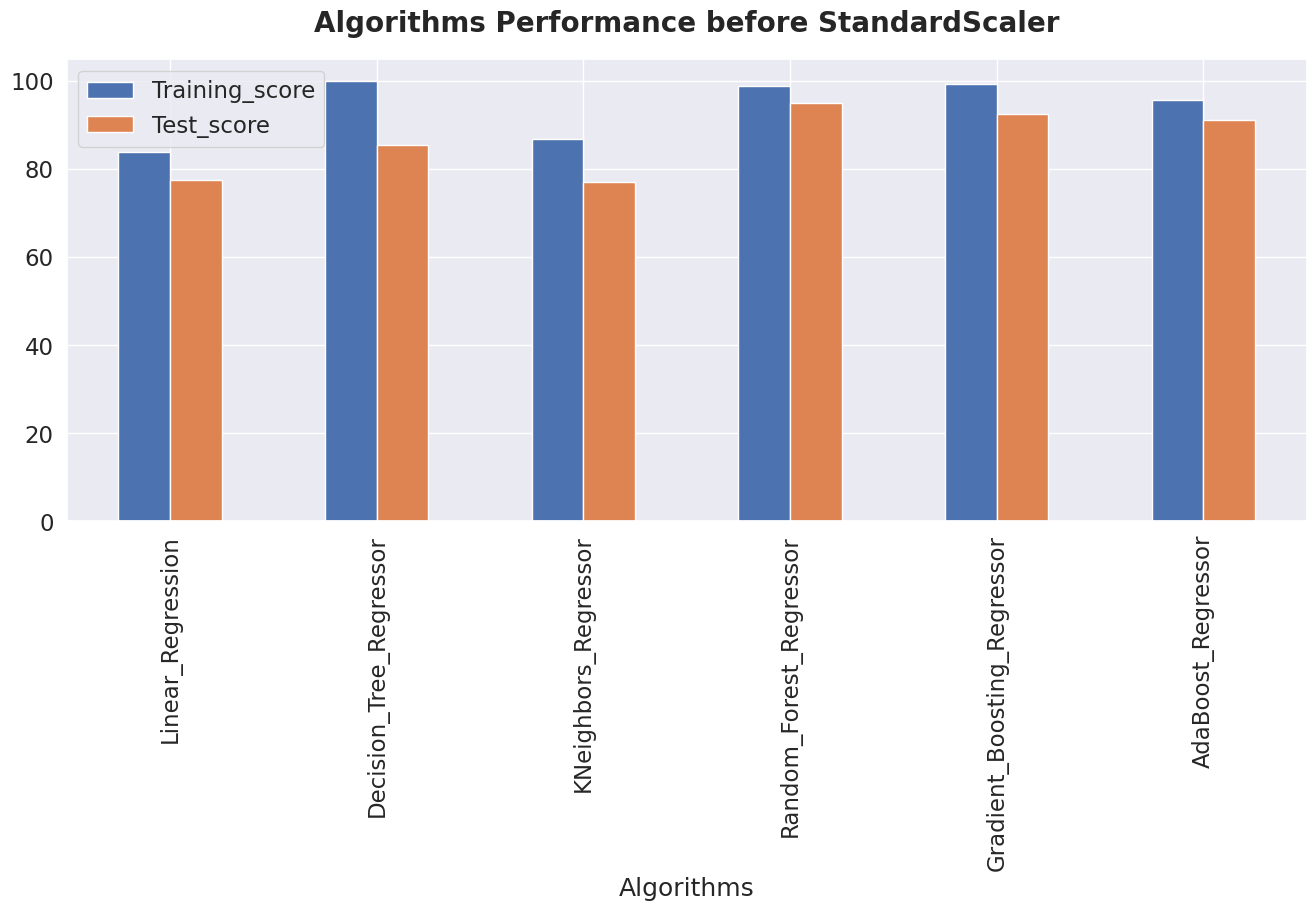

In [846]:
a1 = comparision_df.plot(x='Algorithms',y=['Training_score','Test_score'], kind='bar',figsize=(16,6))
a1.set_title("Algorithms Performance before StandardScaler", fontweight='bold', fontsize=20, pad=20)

In [847]:
comparision_df_ss = pd.DataFrame({'Algorithms':all_models,
                               'Training_score':training_r2_s_score,
                               'Test_score':testing_r2_s_score})

In [848]:
comparision_df_ss

Algorithms  Training_score  Test_score
0            Linear_Regression       83.816777   77.464776
1      Decision_Tree_Regressor       99.868845   85.971177
2         KNeighbors_Regressor       84.284623   77.280409
3      Random_Forest_Regressor       98.665607   95.211068
4  Gradient_Boosting_Regressor       99.223087   92.173156
5           AdaBoost_Regressor       95.938371   90.744894

Text(0.5, 1.0, 'Algorithms Performance after StandardScaler')

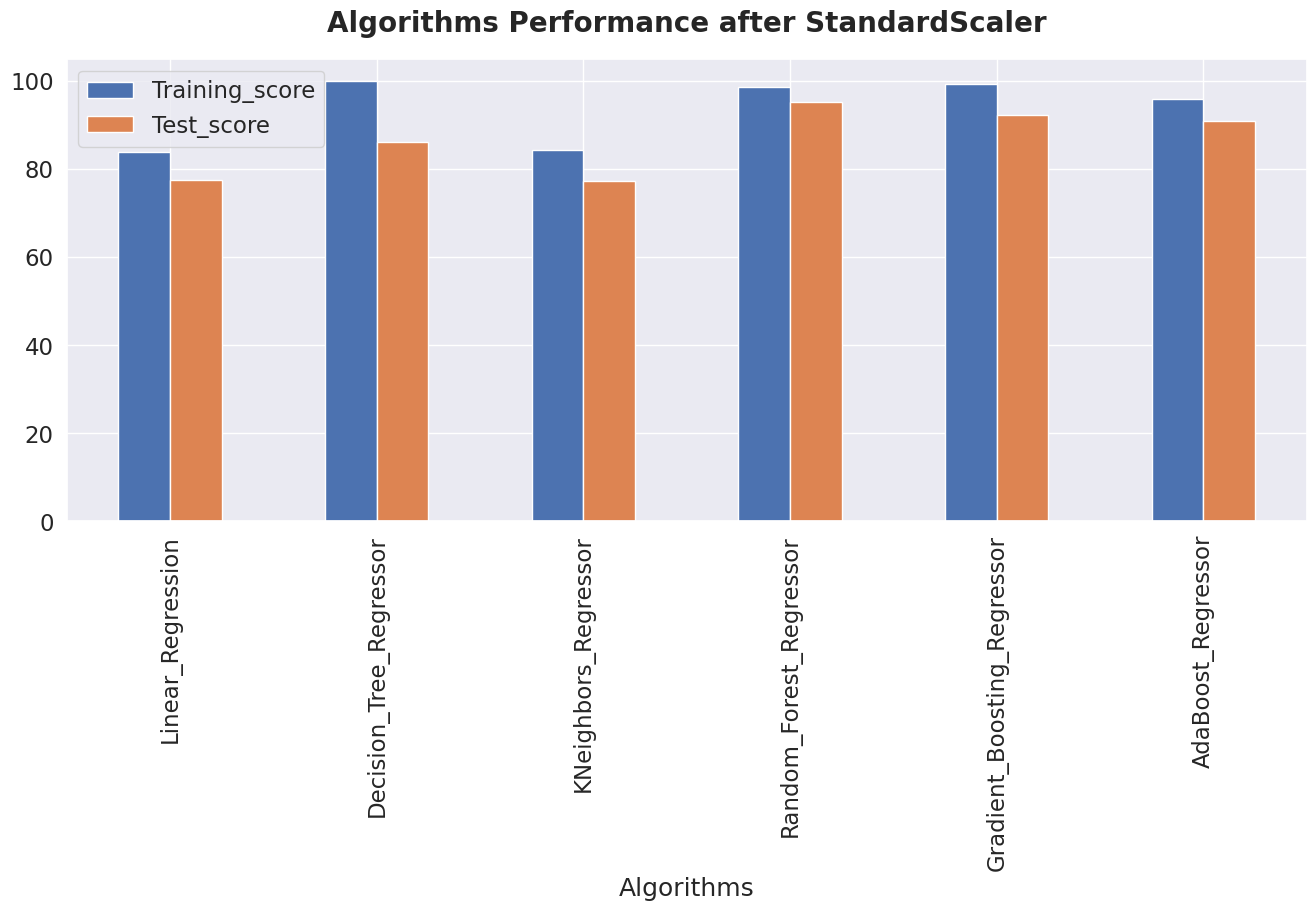

In [849]:
a1 = comparision_df_ss.plot(x='Algorithms',y=['Training_score','Test_score'], kind='bar',figsize=(16,6))
a1.set_title("Algorithms Performance after StandardScaler", fontweight='bold', fontsize=20, pad=20)

**Observation**
* Highest performance was given by Random Forest Model around 95%. 
* Gradient_Boosting_Regressor & AdaBoost_Regressor Model performance was also good.
* So we can use any of these three Models for predicting the price of car in future

Car Price Prediction with Machine Learning.
Key-Points
* First we did the Basic Understanding of Data
* Then we performed Data Cleaning to make the raw data more useable while analysis.
* Then we performed Exploratory Data Analysis to generate insights from the data.
* Then we performed Data Preprocessing to make data suitable for model training & testing.
* Then we trainined our model using different Machine Learning Algorithms.
* In the end we came with 95% accuracy which was given by RandomForestRegression.So we can use this model for predicting price of a car in future.